### List of Content
* [Data Analysis](#Data-Analysis)
* [Data Visualization](#Data-Visualization)
* [Data Pre-processing](#Data-Pre-processing)
* [Model Building](#Model-Building)
* [Model Evaluation](#Model-Evaluation)
* [OOT Validation](#OOT-Validation)
* [Decile Scoring](#Decile-Scoring)
* [Top9 Variable Model](#Top9-Variable-Model)
* [Train Sample Scoring](#Train-Sample-Scoring)

### Data Analysis

#### <a style="color:blue;">Import libraries and dataset</a>

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# Import dataset 
dataset = pd.read_excel('Dataset_25k.xlsx')
dataset = dataset.set_index(dataset['ID'])
dataset = dataset.drop(columns = 'ID')
dataset.head()

,TENURE,DEFAULTER,VO_DAYS_LASTCALLIN,HS_LOSTORSTOLEN3M_IND,DUN_AUTO_N6,DUN_CRLIMIT_N6,PAY_CHANNEL_6MTHS,VAS_AVG3M,ARPU_AVG3M,VOICE_USG_AVG3M,DATA_USG_AVG3M,ACTIVE_LINES_CNT,AVG_ACTIVE_DAYS,OPEN_AMT,LATE_PYMT_CNT,Gender,Race,Age,State,Activation_Type
ID,,,,,,,,,,,,,,,,,,,,
1,150.2,1,91,0,0,0,?,0.00,0.00,0,0.00,1,0,0.00,0,Female,Malay,54,KLANG VALLEY,Normal Activation
2,53.5,0,1,0,0,0,?,0.00,51.73,16686,58.21,1,30,0.00,1,Female,Malay,36,KLANG VALLEY,Normal Activation
3,25.5,1,2,0,0,0,?,19.97,108.90,2405,105.25,1,30,119.82,2,Male,Malay,47,JOHOR,Prepaid to Postpaid Migration
4,144.5,0,0,0,0,0,?,10.05,189.21,18407,0.77,5,28,344.52,0,Female,Chinese,51,PENANG,Port in
5,39.9,1,91,1,2,1,?,0.00,5.60,94,0.02,1,24,5.30,4,Male,Others,53,KLANG VALLEY,Normal Activation


#### <a style="color:blue;">Dataset Overview</a>

In [3]:
# Dataset Overview
print ("Total rows & columns: " , dataset.shape, '\n') 
dataset.info()
dataset.describe()

Total rows & columns:  (25000, 20) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TENURE                 25000 non-null  float64
 1   DEFAULTER              25000 non-null  int64  
 2   VO_DAYS_LASTCALLIN     25000 non-null  int64  
 3   HS_LOSTORSTOLEN3M_IND  25000 non-null  int64  
 4   DUN_AUTO_N6            25000 non-null  int64  
 5   DUN_CRLIMIT_N6         25000 non-null  int64  
 6   PAY_CHANNEL_6MTHS      25000 non-null  object 
 7   VAS_AVG3M              25000 non-null  float64
 8   ARPU_AVG3M             25000 non-null  float64
 9   VOICE_USG_AVG3M        25000 non-null  int64  
 10  DATA_USG_AVG3M         25000 non-null  float64
 11  ACTIVE_LINES_CNT       25000 non-null  int64  
 12  AVG_ACTIVE_DAYS        25000 non-null  int64  
 13  OPEN_AMT               25000 non-null  float64
 14  LATE_PYMT_CNT    

,TENURE,DEFAULTER,VO_DAYS_LASTCALLIN,HS_LOSTORSTOLEN3M_IND,DUN_AUTO_N6,DUN_CRLIMIT_N6,VAS_AVG3M,ARPU_AVG3M,VOICE_USG_AVG3M,DATA_USG_AVG3M,ACTIVE_LINES_CNT,AVG_ACTIVE_DAYS,OPEN_AMT,LATE_PYMT_CNT,Age
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,55.407364,0.019880,11.693760,0.096720,0.193640,0.073000,6.870771,84.818479,15132.432360,27.503980,1.537080,27.291280,43.378773,1.172000,28.659920
std,42.762079,0.139591,28.120761,0.295582,0.647333,0.382305,31.609840,76.676740,28114.946397,50.745345,1.064796,7.138151,120.870619,1.301785,375.696389
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-109.190000,0.000000,0.000000,1.000000,0.000000,-2327.670000,0.000000,-9999.000000
25%,24.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.280000,903.000000,2.460000,1.000000,30.000000,0.000000,0.000000,32.000000
50%,44.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.910000,5346.500000,12.160000,1.000000,30.000000,0.000000,1.000000,41.000000
75%,70.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.050000,102.100000,17039.000000,36.672500,2.000000,30.000000,69.970000,2.000000,52.000000
max,319.000000,1.000000,91.000000,1.000000,6.000000,6.000000,1128.530000,1410.540000,479434.000000,1503.080000,30.000000,30.000000,1435.300000,7.000000,121.000000


In [4]:
# Defaulter Rate (0.02%)
dataset['DEFAULTER'].value_counts()

0    24503
1      497
Name: DEFAULTER, dtype: int64

### Data Visualization

#### <a style="color:blue;">Split Variable</a>

In [5]:
# Target 
target = ['DEFAULTER']

# Seperate the data into Numerical and Categorical Data
numerical_val = [i for i in dataset.columns if dataset[i].dtypes != 'object']
categorical_val = [i for i in dataset.columns if dataset[i].dtypes == 'object']

# Numerical in dataframe
numerical_df = dataset[numerical_val]

# Categorical data in dataframe
categorical_df = dataset[categorical_val]

#### <a style="color:blue;">Distribution and Outlier Checking</a>

IndexError: list index out of range

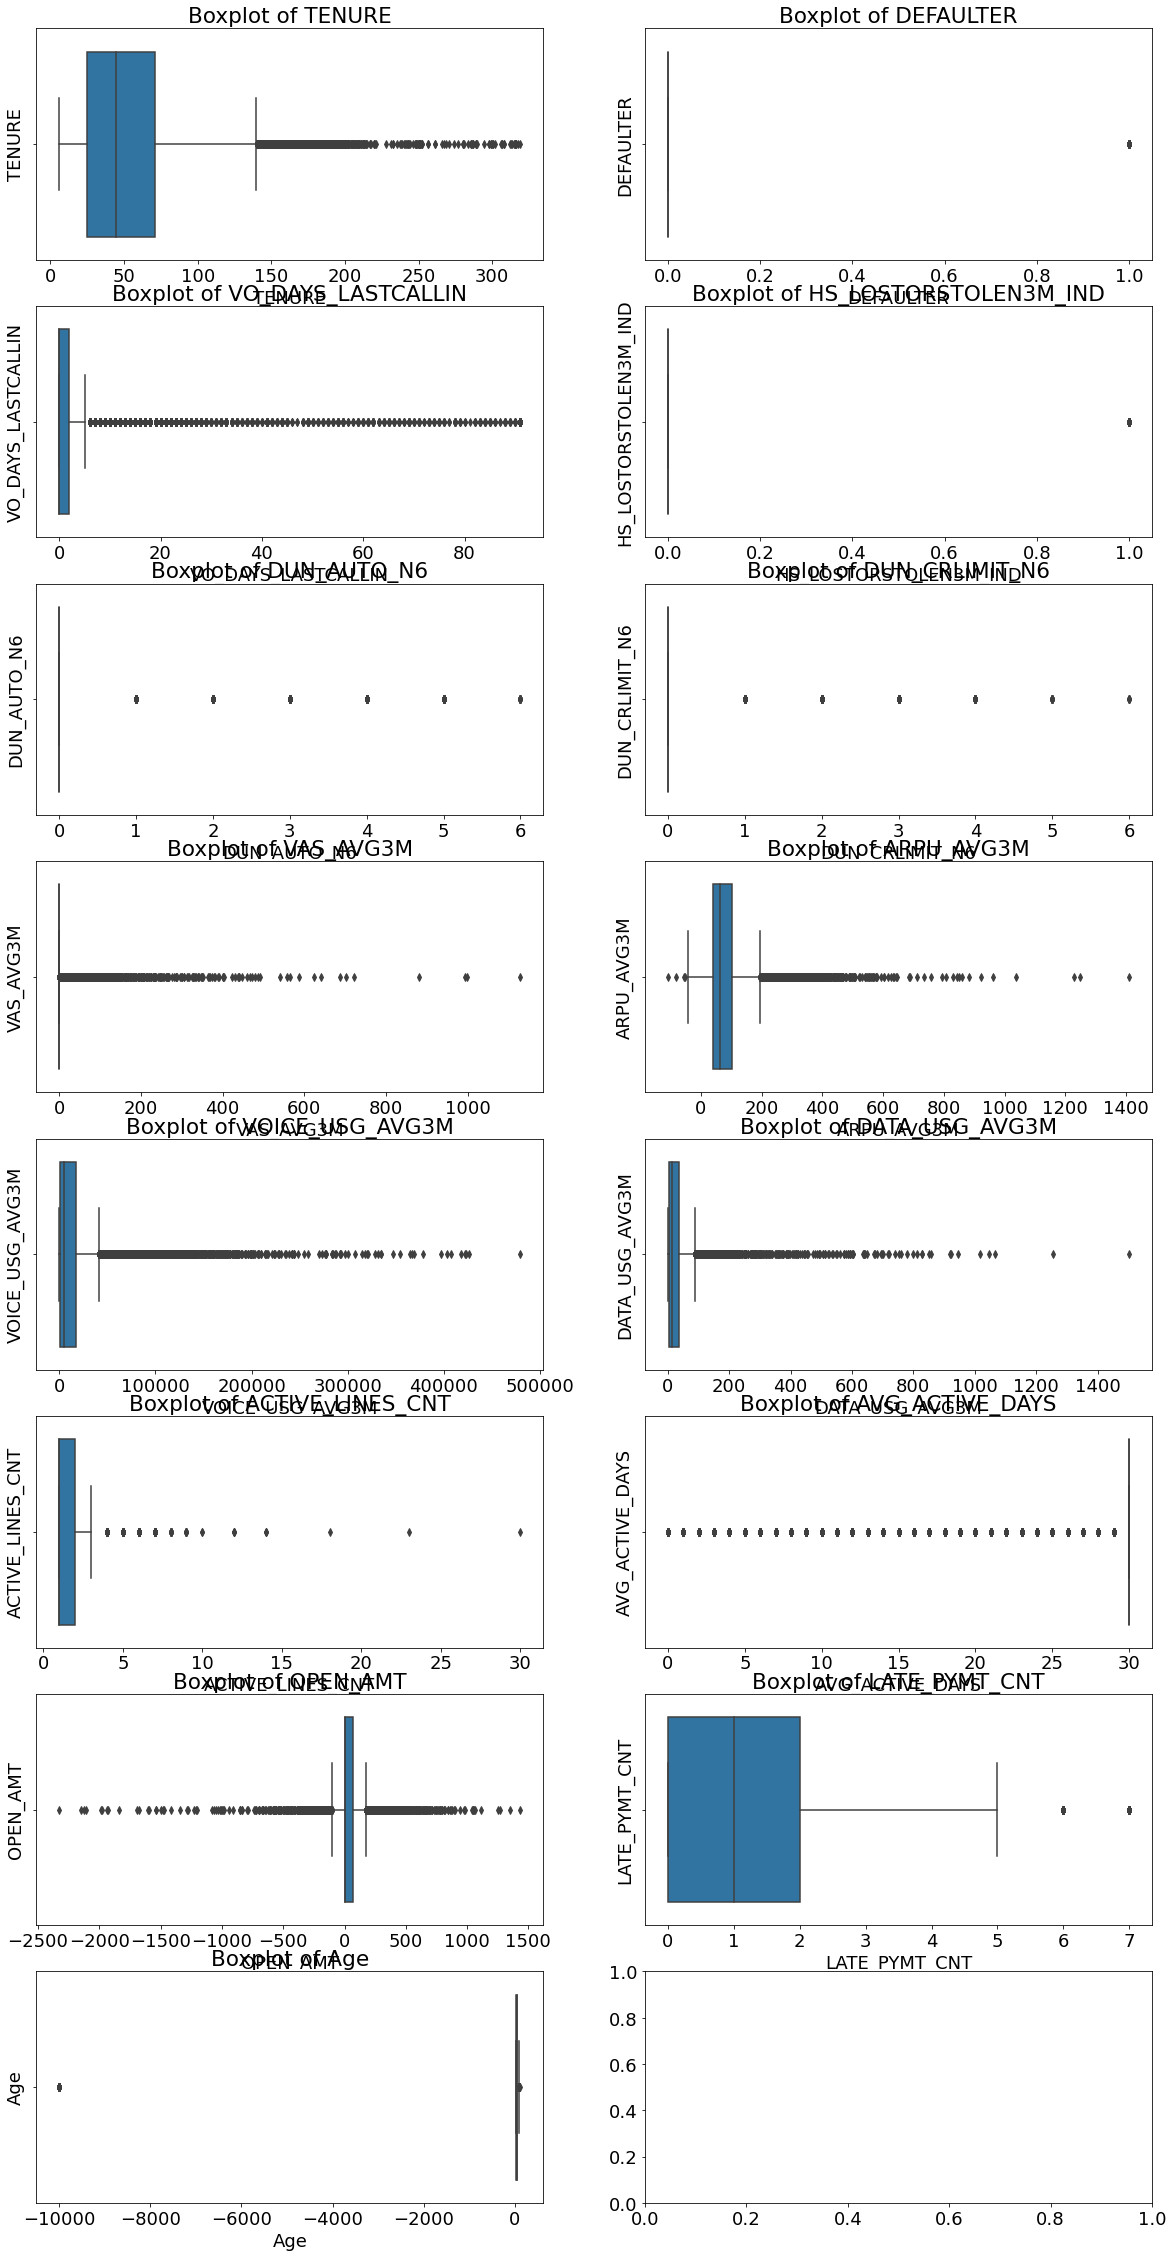

In [6]:
# Numerical - Outliers Checking 
plt.rcParams.update({'font.size': 18})

fig , ax = plt.subplots(8,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel=k, ylabel=k)
        ax[i, j].set(title='Boxplot of '+k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

IndexError: list index out of range

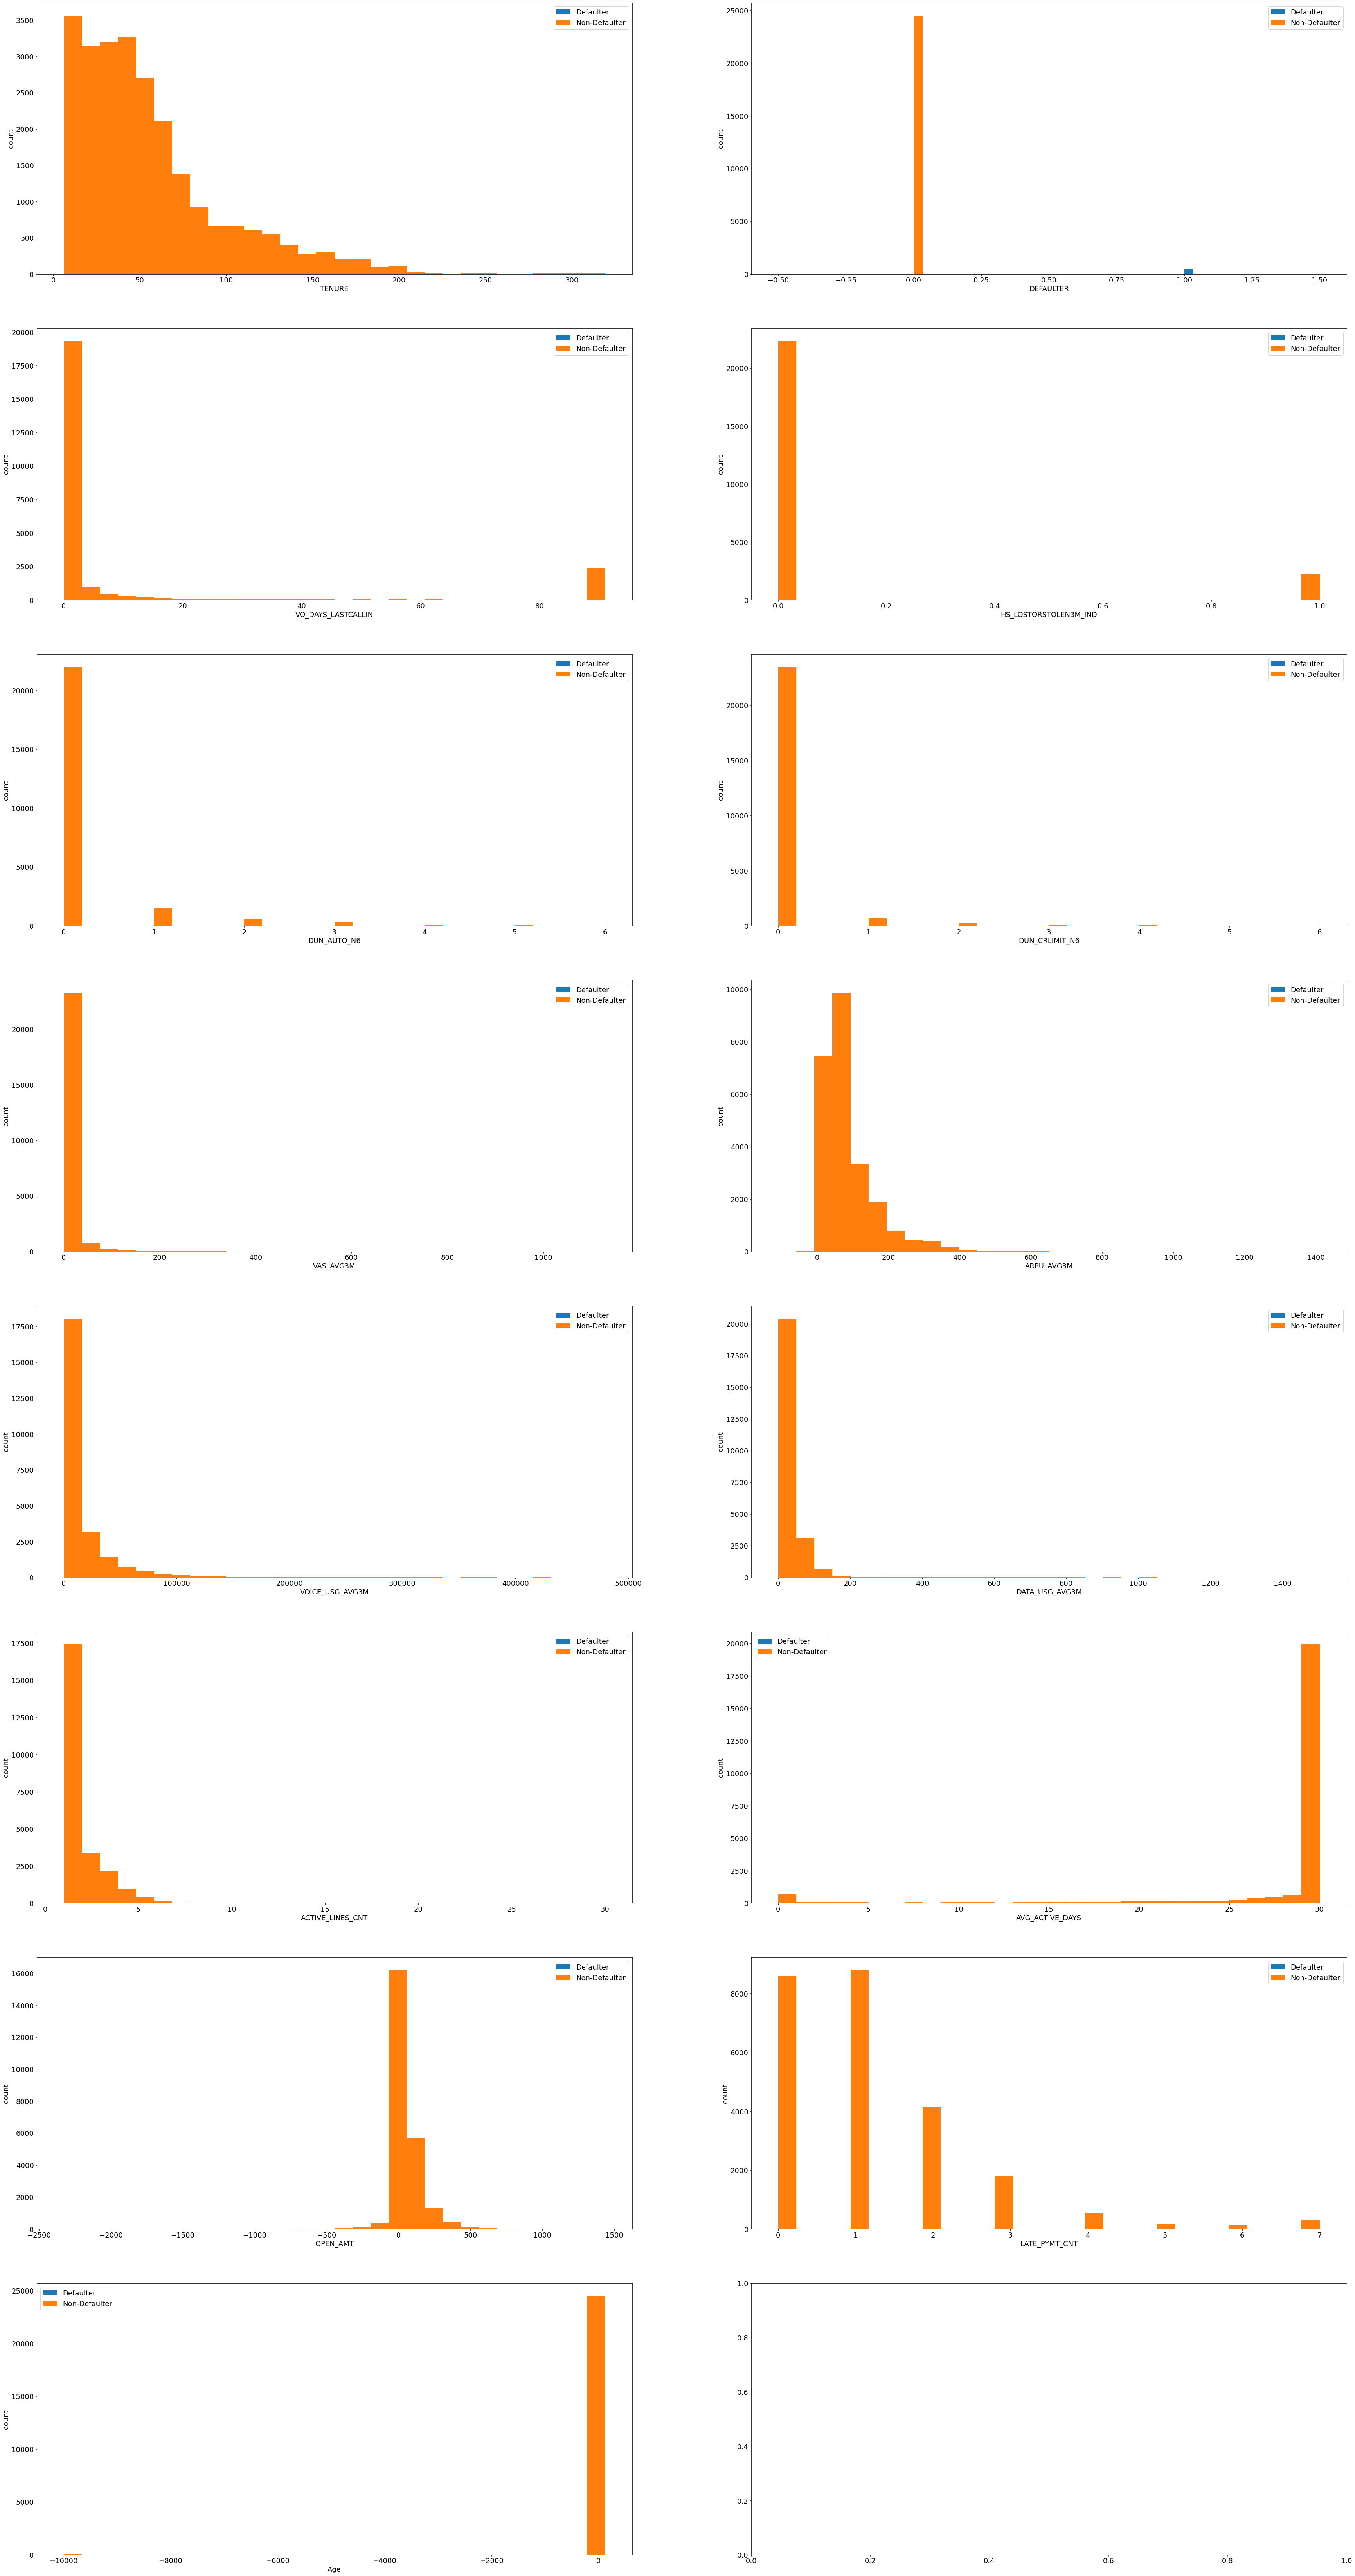

In [7]:
# Numerical - Distribution Checking
fig , ax = plt.subplots(8,2, figsize=(60,120))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = numerical_val[numerical_var_count]

        ax[i, j].hist(numerical_df[numerical_df[target[0]]==1][x],label='Defaulter',bins=30)
        ax[i, j].hist(numerical_df[numerical_df[target[0]]==0][x],label='Non-Defaulter',bins=30)
        ax[i, j].set(xlabel=x,ylabel='count')
        ax[i, j].legend()
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

?                    24590
Other-Credit Card      158
Other-Other            140
Other-Cash              48
KIOSK-Cash              33
Other-Flexieload        24
KIOSK-Credit Card        6
POS Malaysia-Cash        1
Name: PAY_CHANNEL_6MTHS, dtype: int64

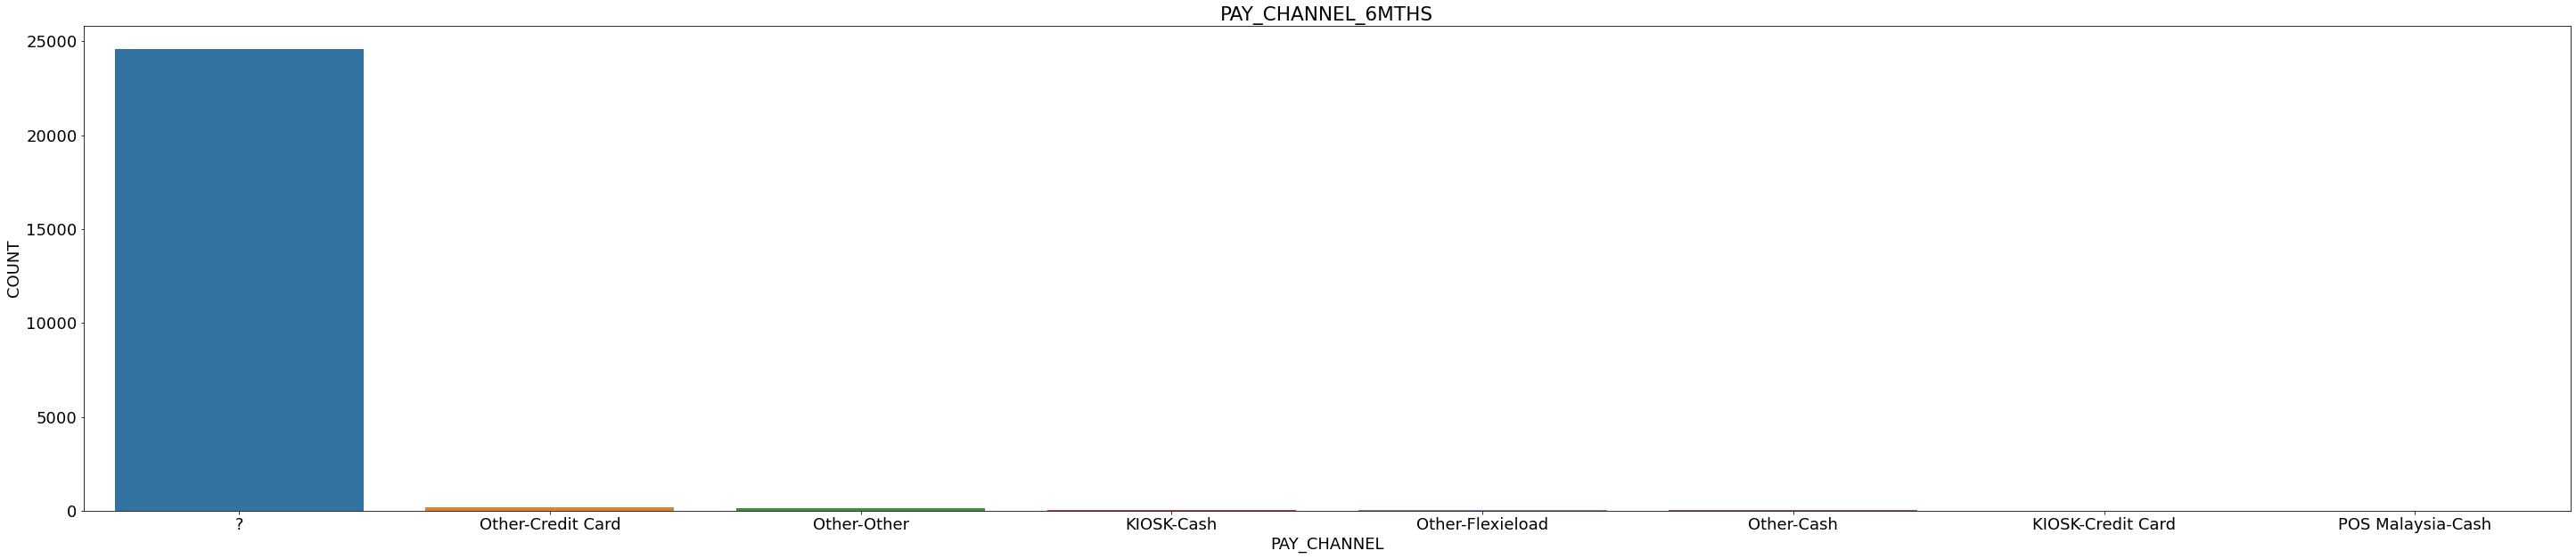

In [8]:
# Categorical - Distribution and Outlier Checking 
plt.figure(figsize=(50, 10))
sns.countplot(dataset['PAY_CHANNEL_6MTHS'])
plt.title('PAY_CHANNEL_6MTHS')
plt.xlabel('PAY_CHANNEL')
plt.ylabel('COUNT')

dataset['PAY_CHANNEL_6MTHS'].value_counts()

Male          12909
Female        11553
Unspecifie      506
?                32
Name: Gender, dtype: int64

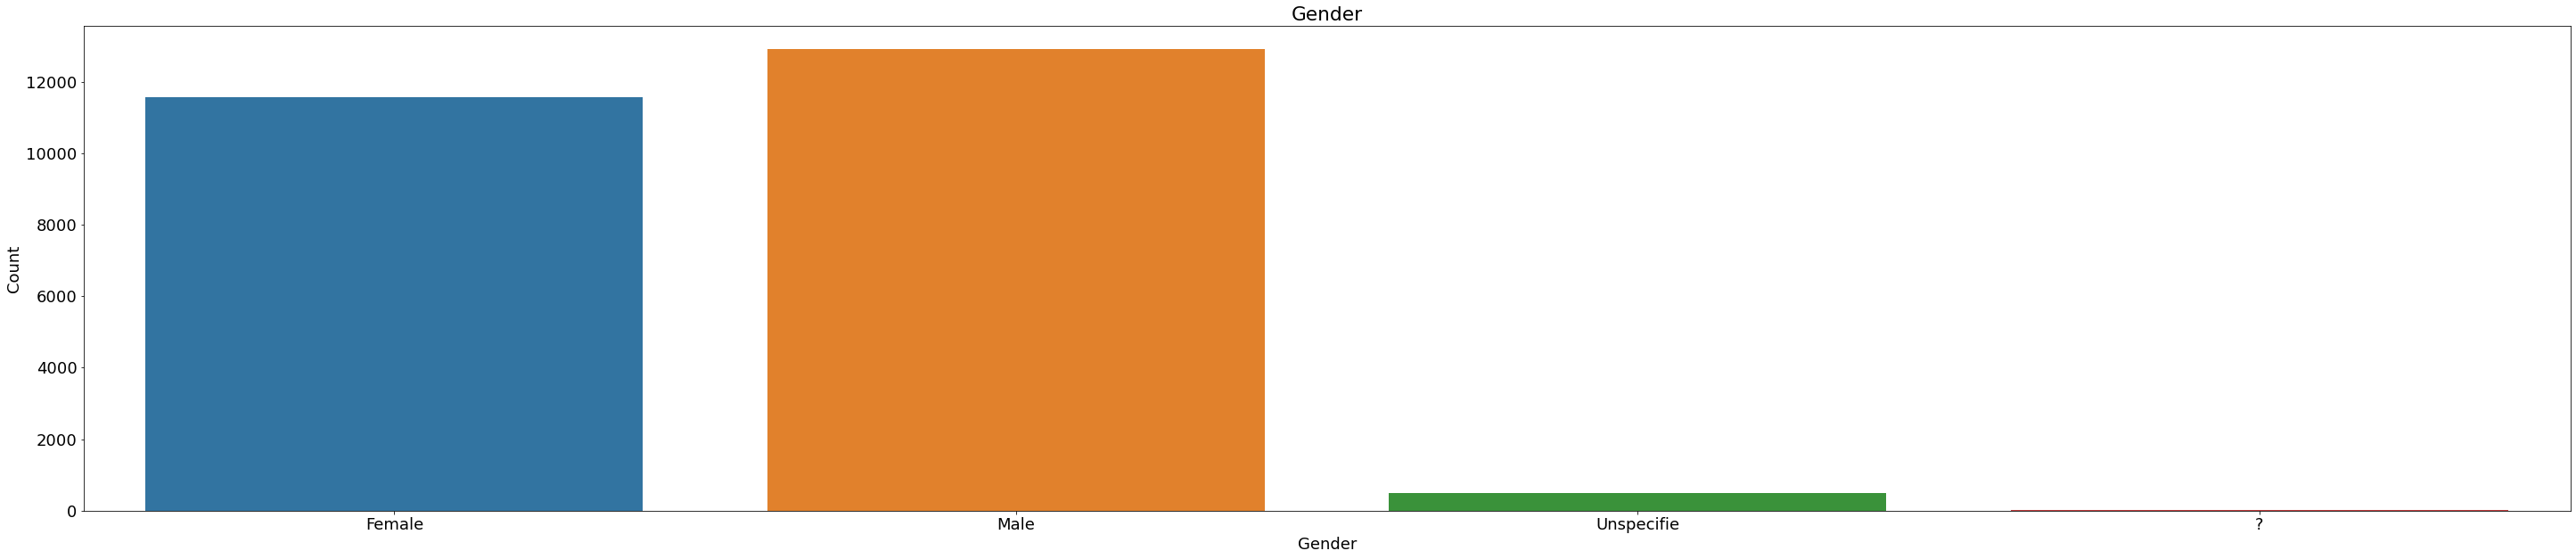

In [9]:
plt.figure(figsize=(50, 10))
sns.countplot(dataset['Gender'])
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

dataset['Gender'].value_counts()

Chinese    11496
Malay       7284
Others      3523
Indian      2694
?              3
Name: Race, dtype: int64

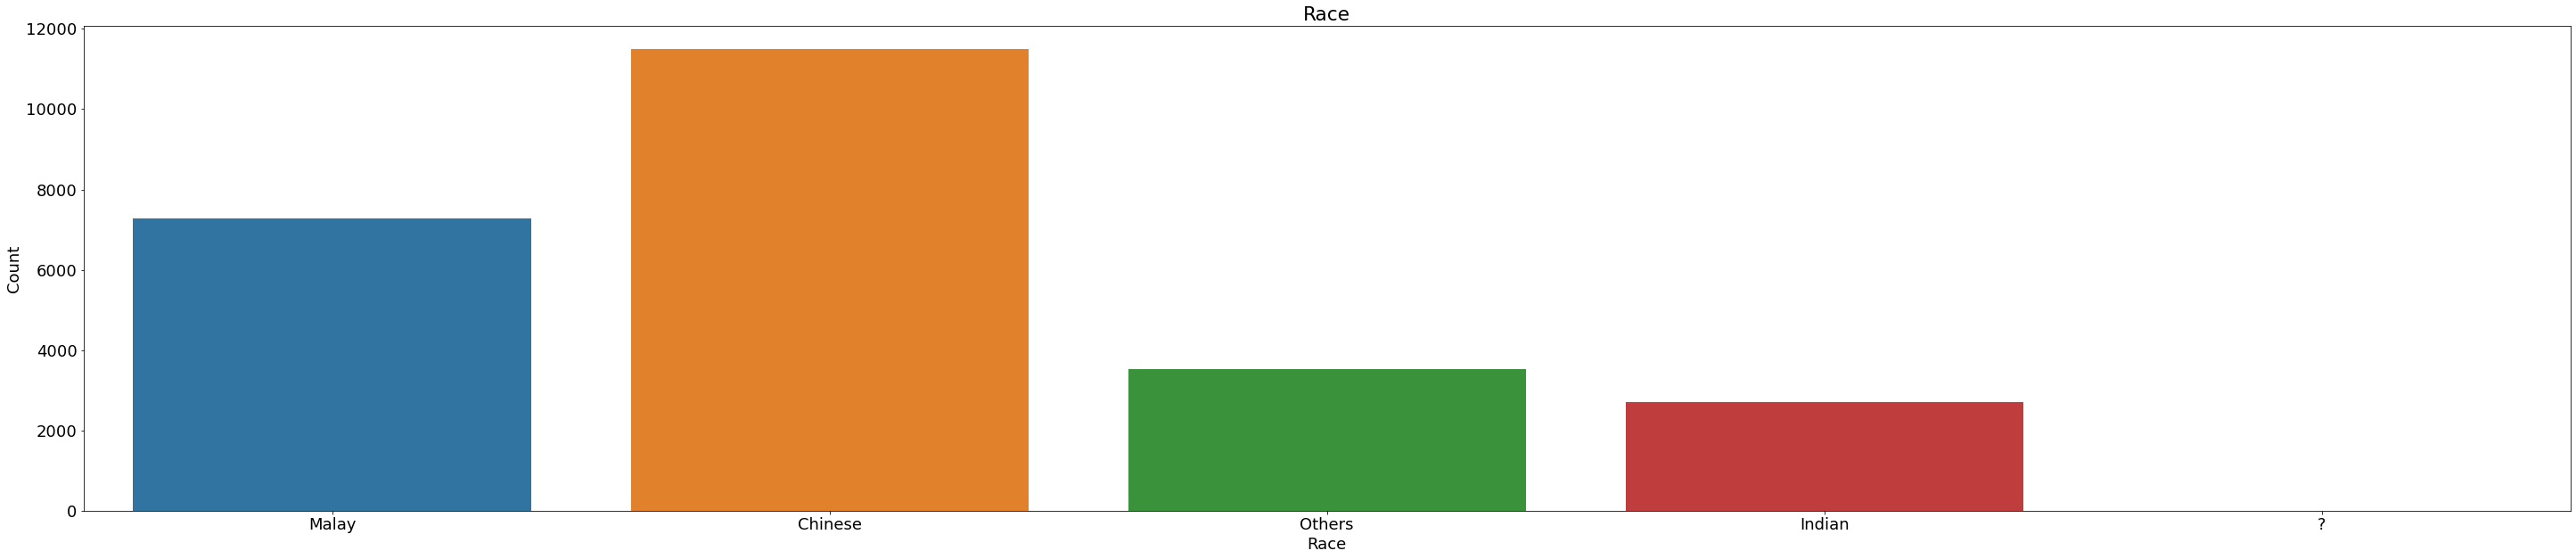

In [10]:
plt.figure(figsize=(50, 10))
sns.countplot(dataset['Race'])
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Count')

dataset['Race'].value_counts()

KLANG VALLEY           9491
JOHORE                 2481
SARAWAK                2364
SABAH                  2158
PERAK                  2129
PENANG                 1973
PAHANG                  851
KEDAH                   786
N SEMBILAN              692
MALACCA                 675
TERENGGANU              398
KELANTAN                349
JOHOR                   233
SELANGOR                168
PERLIS                   68
WILAYAH PERSEKUTUAN      61
SEREMBAN/MELAKA          44
NEGERI SEMBILAN          33
MELAKA                   24
PULAU PINANG             20
UNKNOWN                   2
Name: State, dtype: int64

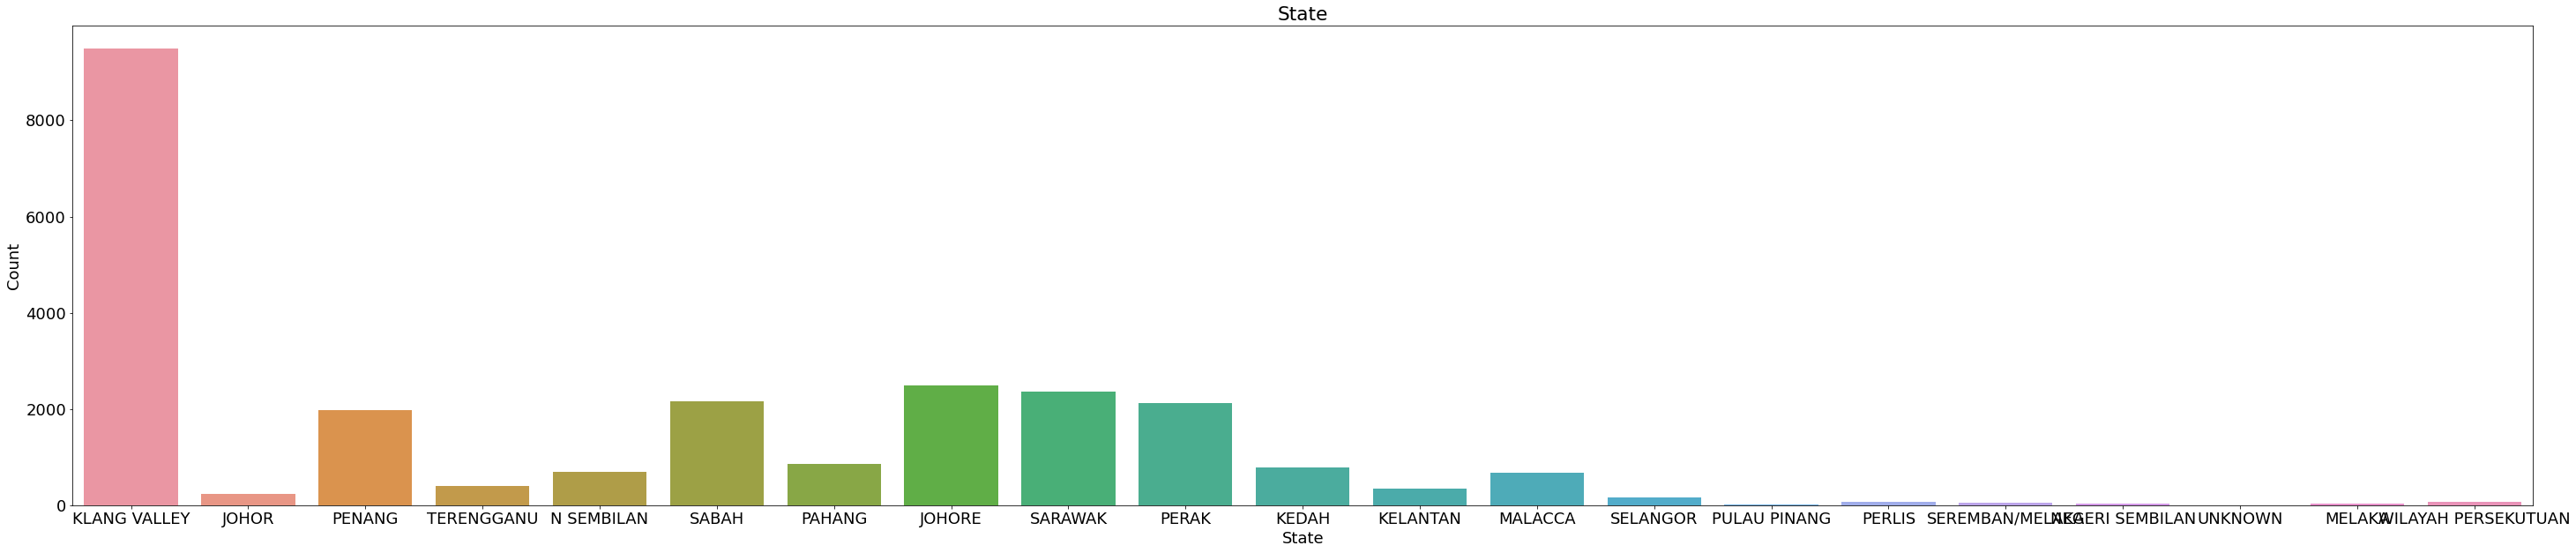

In [11]:
plt.figure(figsize=(50, 10))
sns.countplot(dataset['State'])
plt.title('State')
plt.xlabel('State')
plt.ylabel('Count')

dataset['State'].value_counts()

Normal Activation                9530
Prepaid to Postpaid Migration    7776
Port in                          6234
Transfer of Ownership            1406
Migration to New Structure         54
Name: Activation_Type, dtype: int64

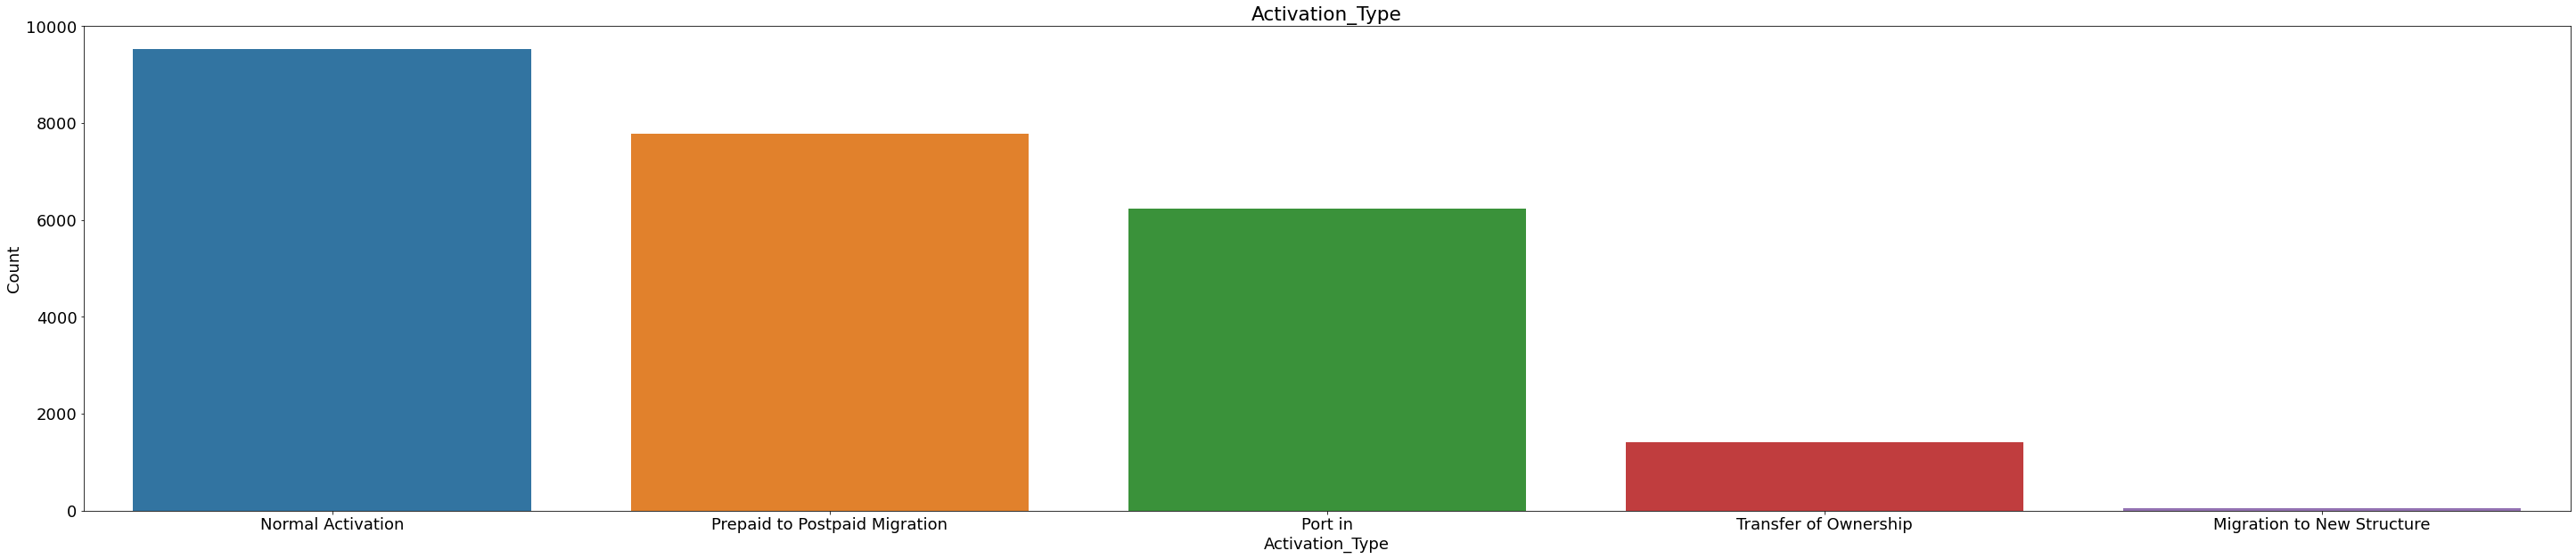

In [12]:
plt.figure(figsize=(50, 10))
sns.countplot(dataset['Activation_Type'])
plt.title('Activation_Type')
plt.xlabel('Activation_Type')
plt.ylabel('Count')

dataset['Activation_Type'].value_counts()

#### <a style="color:blue;">Bivariate Analysis</a>

IndexError: list index out of range

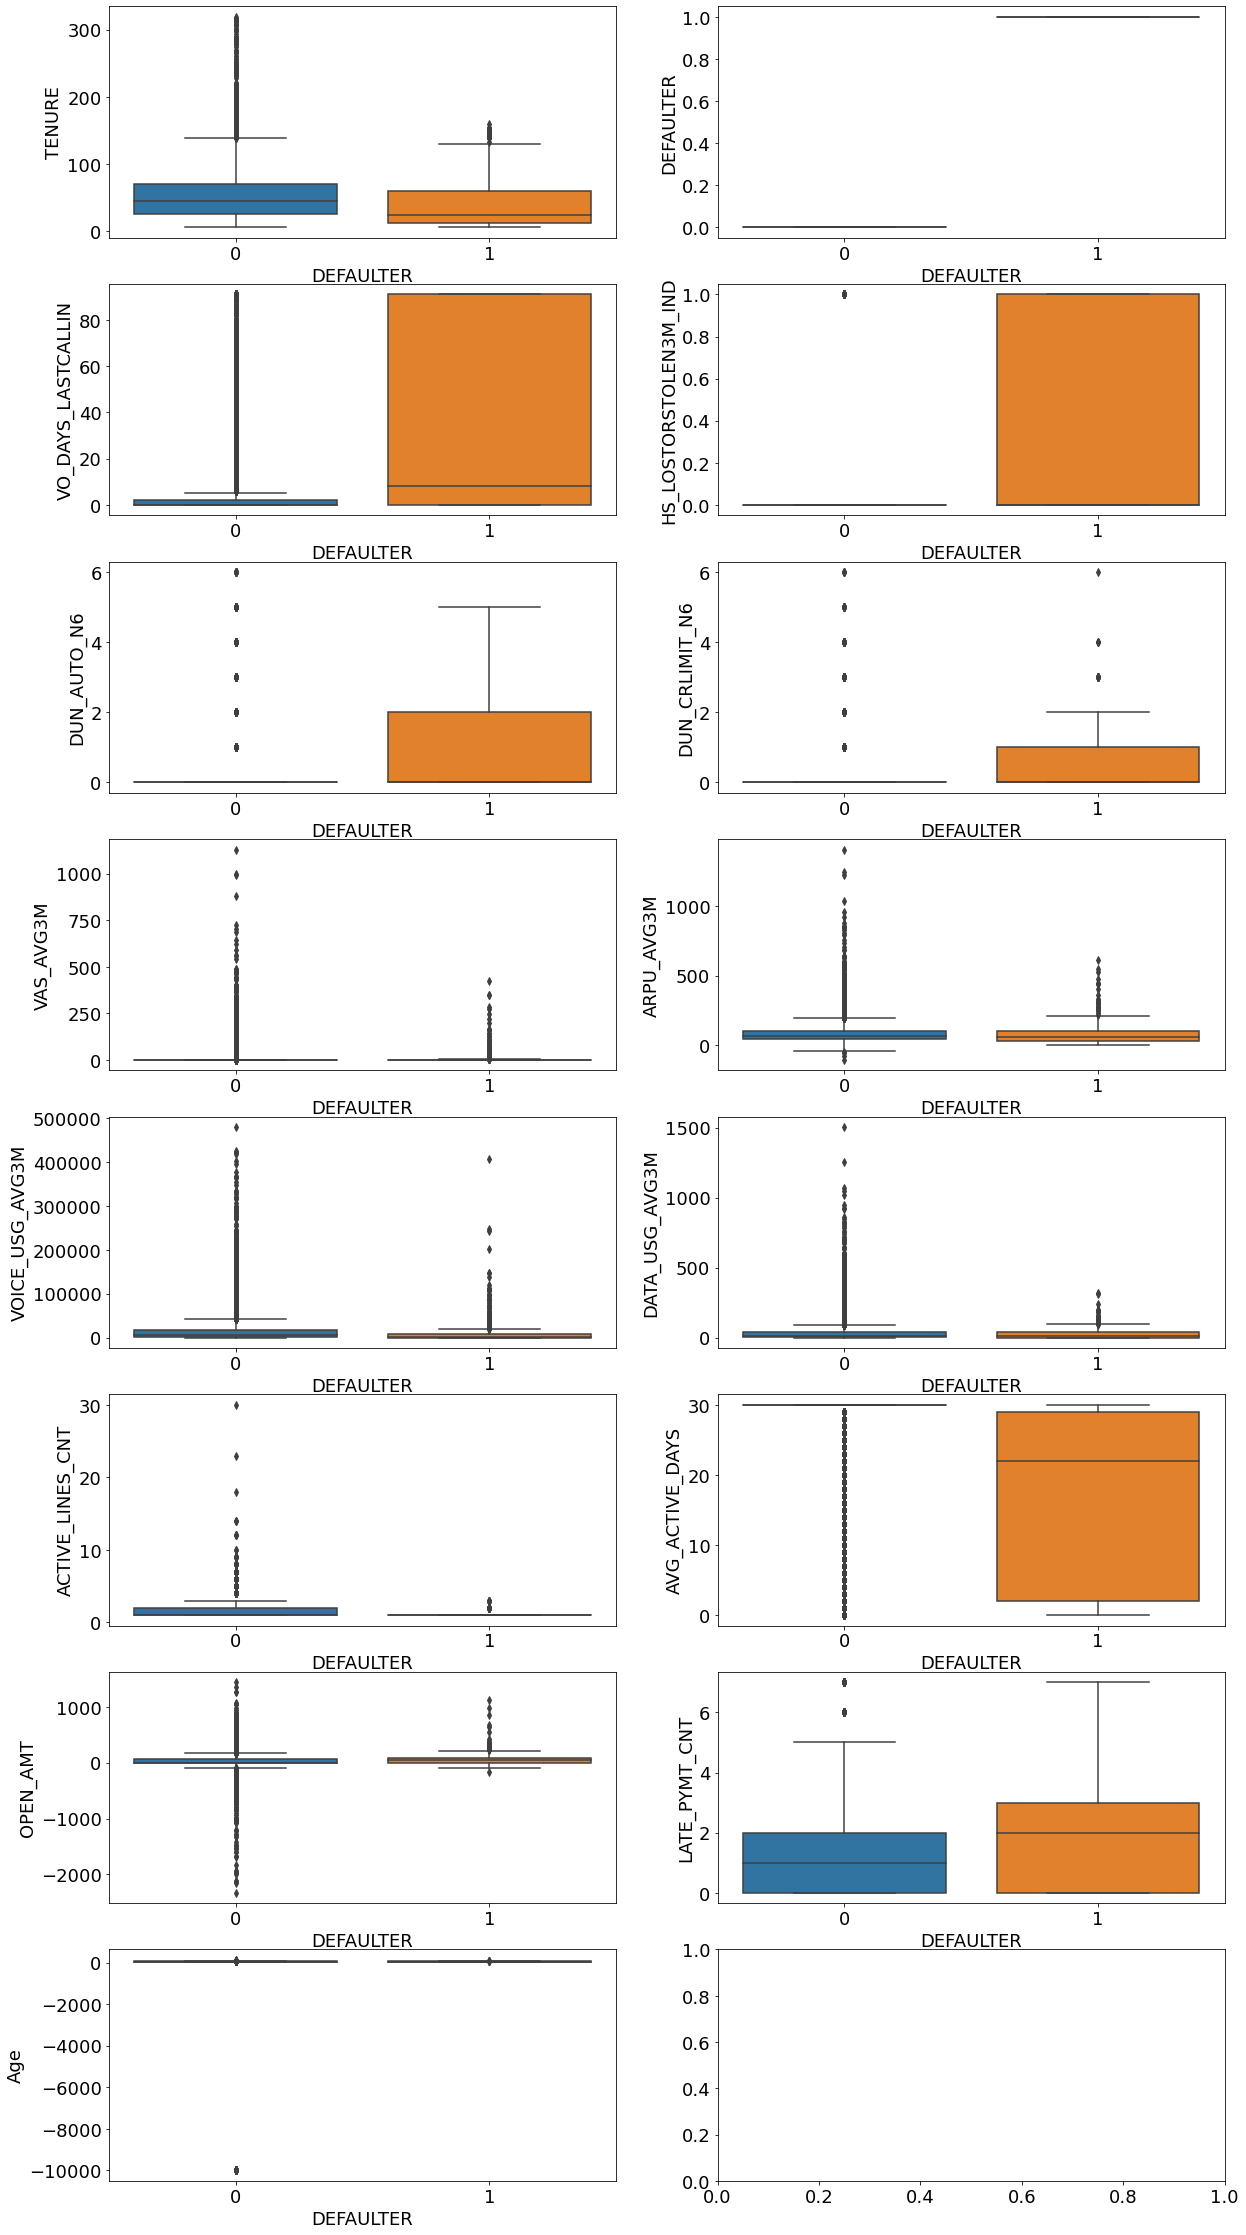

In [13]:
# Numerical Boxplot 
fig , ax = plt.subplots(8,2,figsize=(20,40))

numerical_var_count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        
        k = numerical_val[numerical_var_count]
        
        sns.boxplot(x=numerical_df['DEFAULTER'], y=numerical_df[k], ax=ax[i,j])
        ax[i,j].set(xlabel='DEFAULTER', ylabel=k)
        numerical_var_count = numerical_var_count + 1
        
plt.tight_layout()

DEFAULTER  PAY_CHANNEL_6MTHS
0          ?                    24106
           Other-Credit Card      154
           Other-Other            134
           Other-Cash              47
           KIOSK-Cash              32
           Other-Flexieload        23
           KIOSK-Credit Card        6
           POS Malaysia-Cash        1
1          ?                      484
           Other-Other              6
           Other-Credit Card        4
           KIOSK-Cash               1
           Other-Cash               1
           Other-Flexieload         1
Name: PAY_CHANNEL_6MTHS, dtype: int64


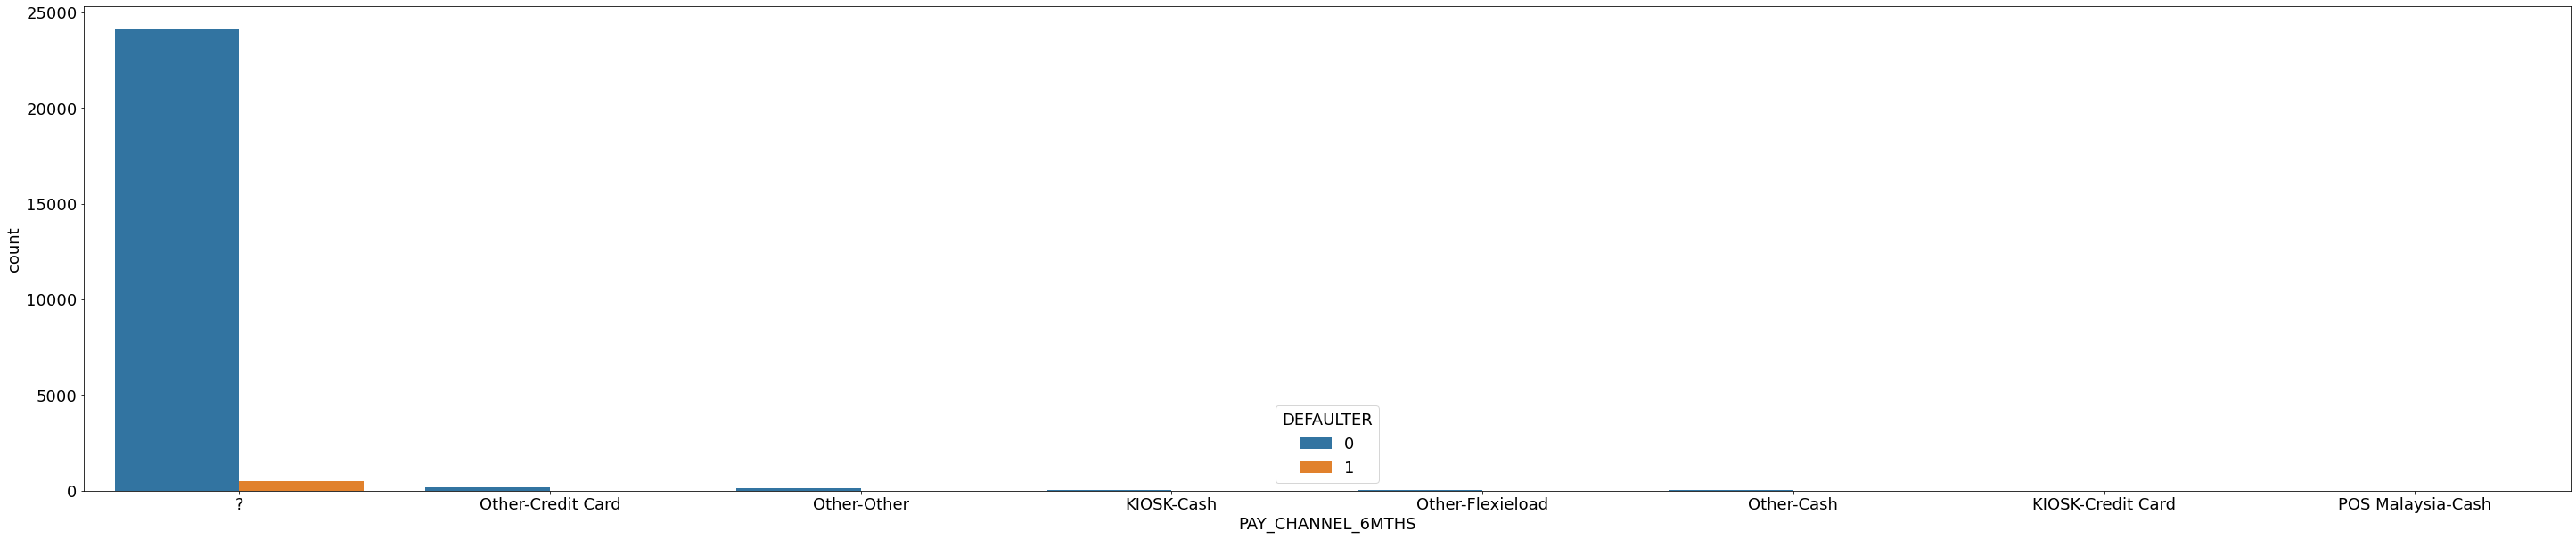

In [14]:
# Categorical Barchart
plt.figure(figsize=(50, 10))
ax = sns.countplot(x="PAY_CHANNEL_6MTHS", hue="DEFAULTER", data=dataset)
#plt.savefig('D:/LTE.png')

print(dataset.groupby('DEFAULTER')['PAY_CHANNEL_6MTHS'].value_counts())

DEFAULTER  Gender    
0          Male          12637
           Female        11334
           Unspecifie      500
           ?                32
1          Male            272
           Female          219
           Unspecifie        6
Name: Gender, dtype: int64


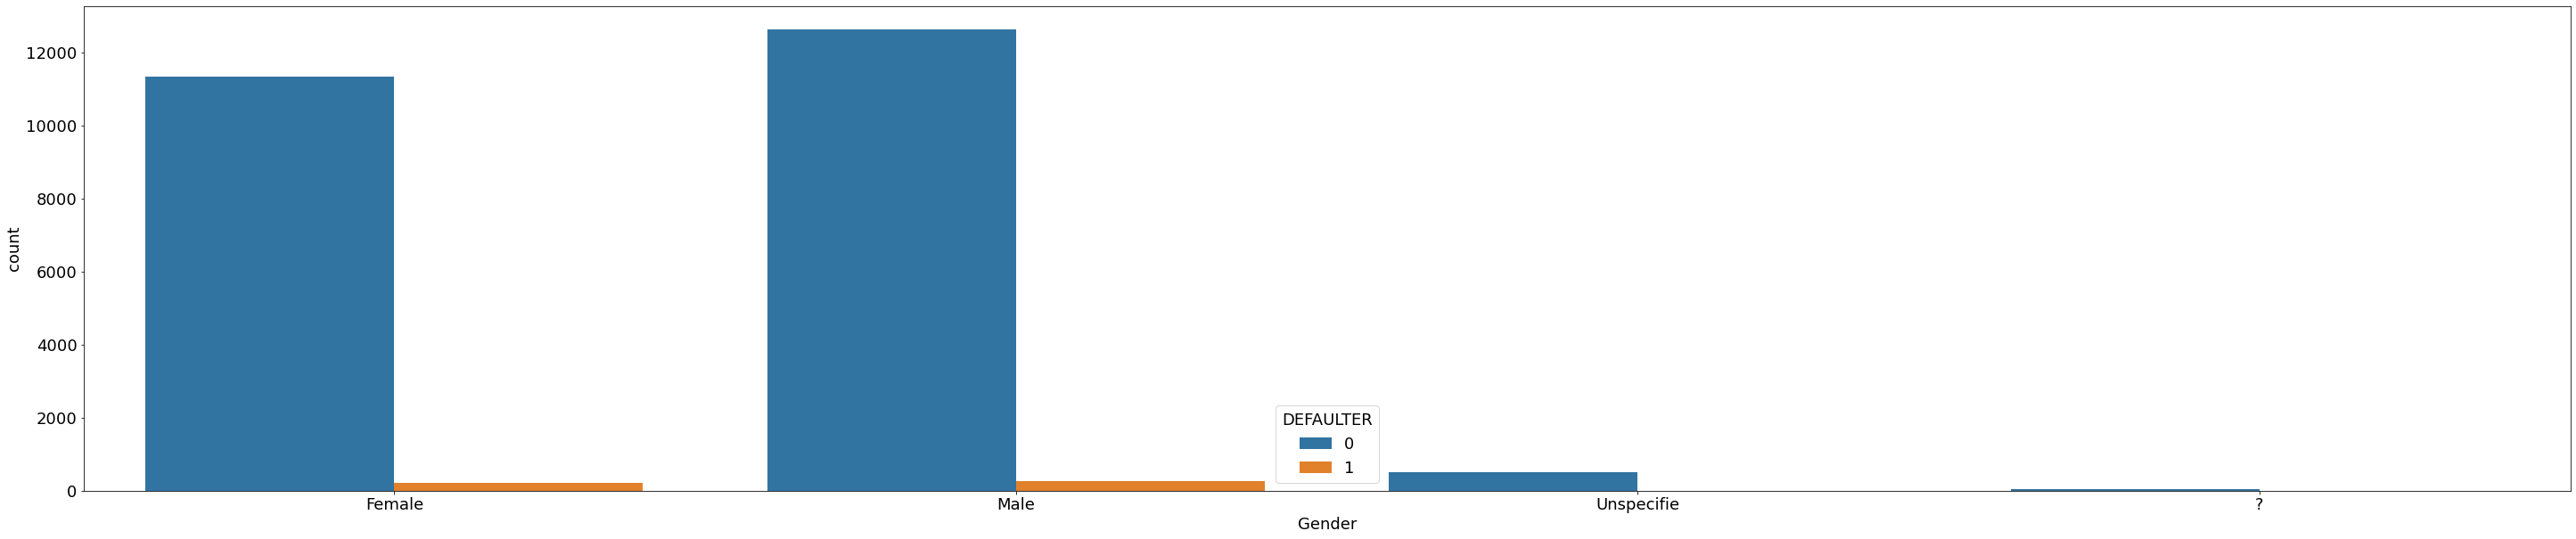

In [15]:
plt.figure(figsize=(50, 10))
ax = sns.countplot(x="Gender", hue="DEFAULTER", data=dataset)
#plt.savefig('D:/LTE.png')

print(dataset.groupby('DEFAULTER')['Gender'].value_counts())

DEFAULTER  Race   
0          Chinese    11428
           Malay       7050
           Others      3401
           Indian      2621
           ?              3
1          Malay        234
           Others       122
           Indian        73
           Chinese       68
Name: Race, dtype: int64


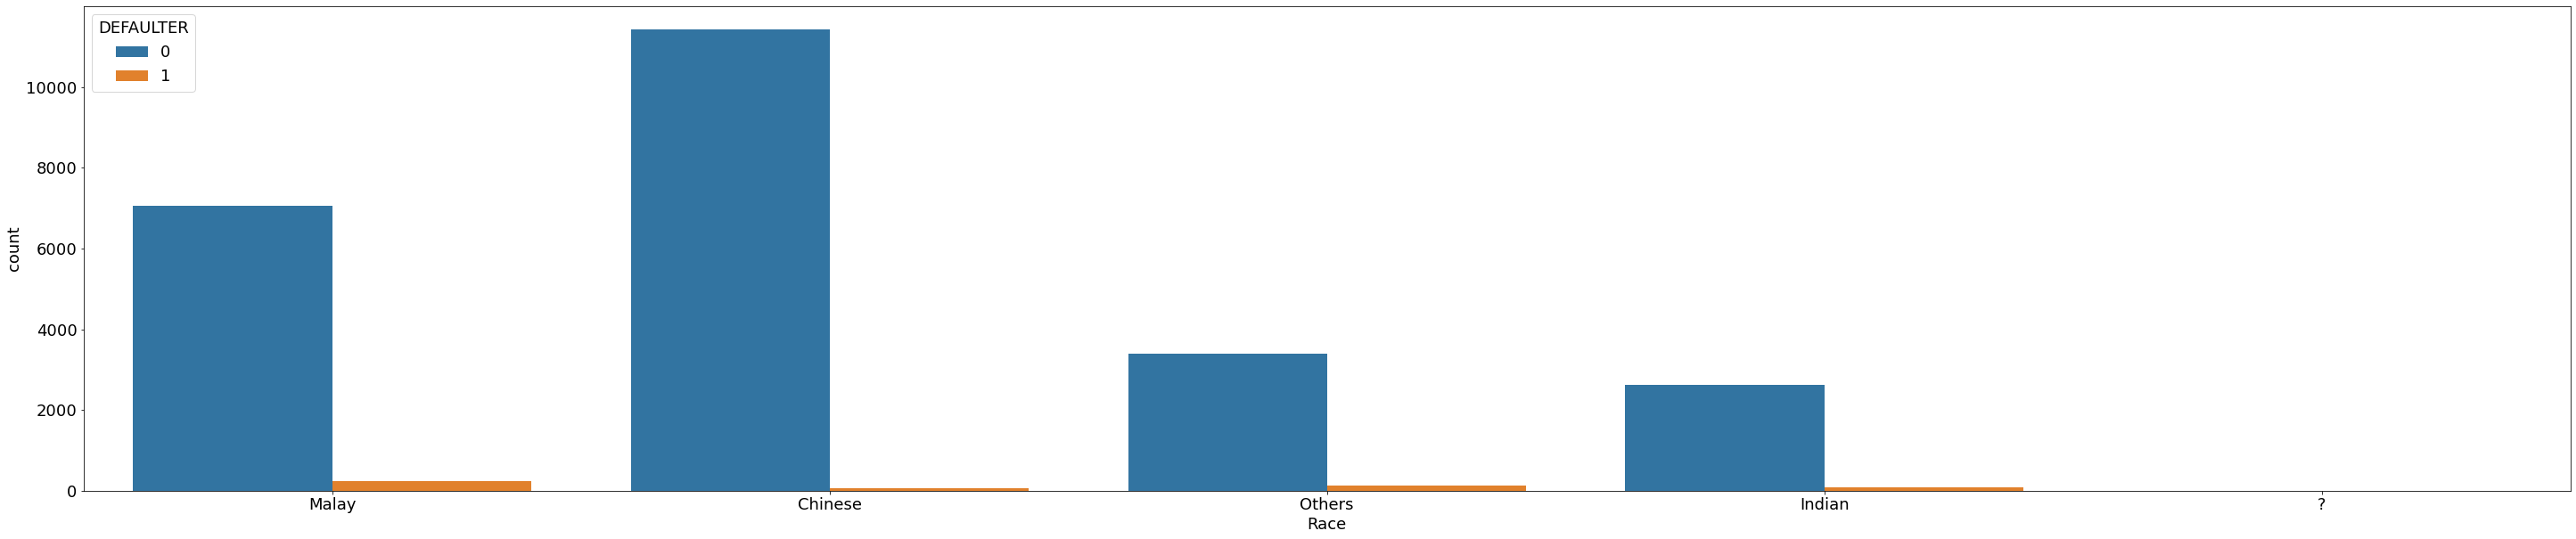

In [16]:
plt.figure(figsize=(50, 10))
ax = sns.countplot(x="Race", hue="DEFAULTER", data=dataset)
#plt.savefig('D:/LTE.png')

print(dataset.groupby('DEFAULTER')['Race'].value_counts())

DEFAULTER  State              
0          KLANG VALLEY           9303
           JOHORE                 2442
           SARAWAK                2323
           SABAH                  2113
           PERAK                  2085
           PENANG                 1941
           PAHANG                  832
           KEDAH                   764
           N SEMBILAN              674
           MALACCA                 664
           TERENGGANU              383
           KELANTAN                337
           JOHOR                   228
           SELANGOR                167
           PERLIS                   65
           WILAYAH PERSEKUTUAN      61
           SEREMBAN/MELAKA          43
           NEGERI SEMBILAN          33
           MELAKA                   24
           PULAU PINANG             20
           UNKNOWN                   1
1          KLANG VALLEY            188
           SABAH                    45
           PERAK                    44
           SARAWAK               

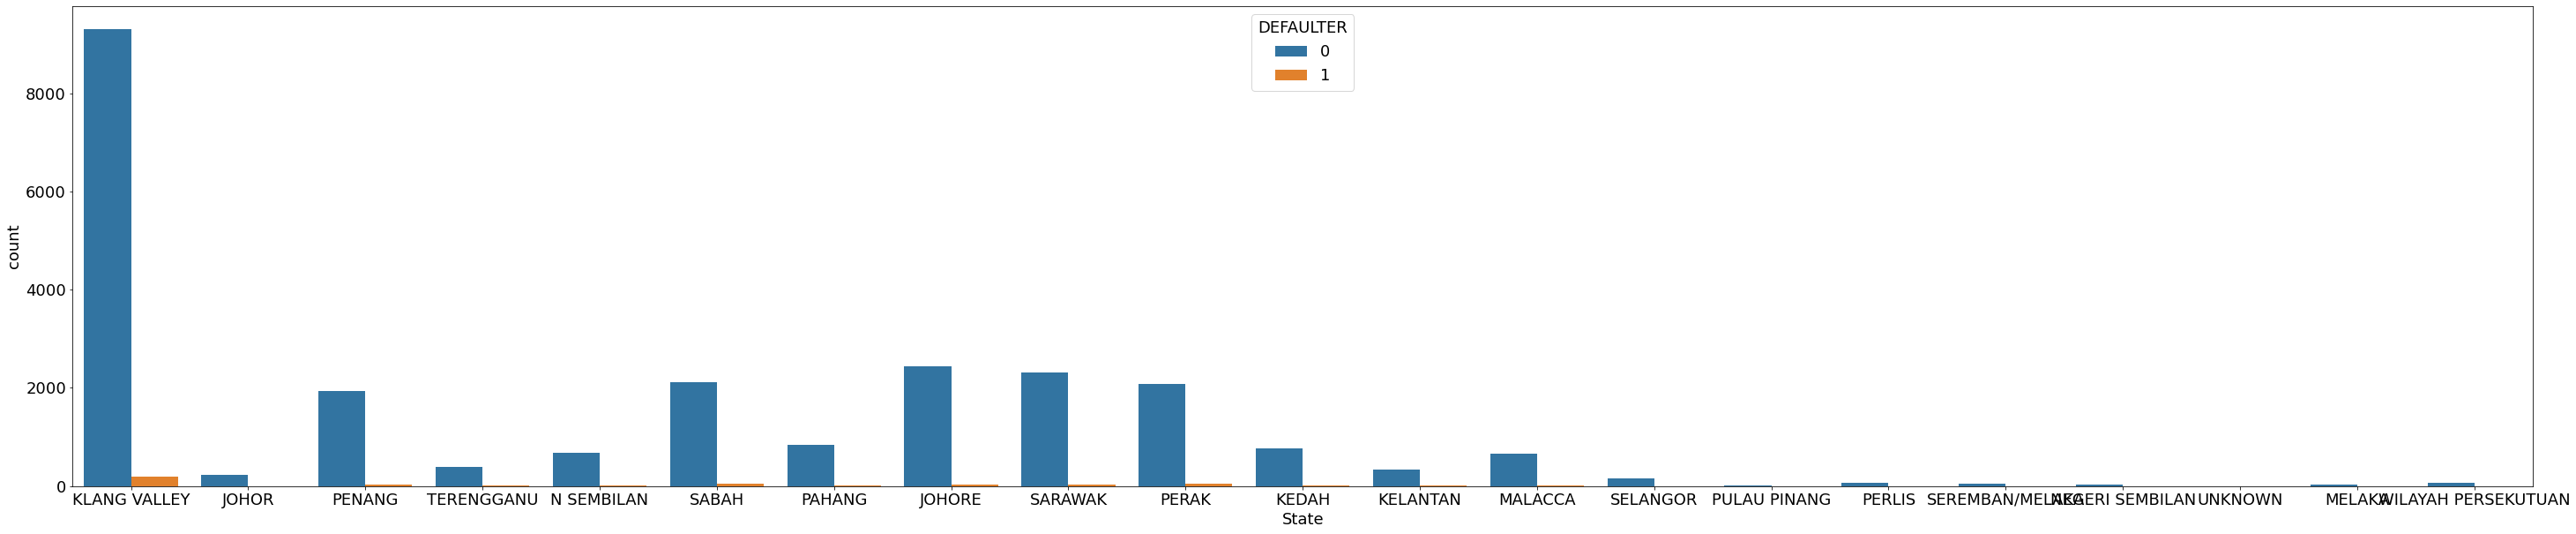

In [17]:
plt.figure(figsize=(50, 10))
ax = sns.countplot(x="State", hue="DEFAULTER", data=dataset)
#plt.savefig('D:/LTE.png')

print(dataset.groupby('DEFAULTER')['State'].value_counts())

DEFAULTER  Activation_Type              
0          Normal Activation                9162
           Prepaid to Postpaid Migration    7683
           Port in                          6204
           Transfer of Ownership            1400
           Migration to New Structure         54
1          Normal Activation                 368
           Prepaid to Postpaid Migration      93
           Port in                            30
           Transfer of Ownership               6
Name: Activation_Type, dtype: int64


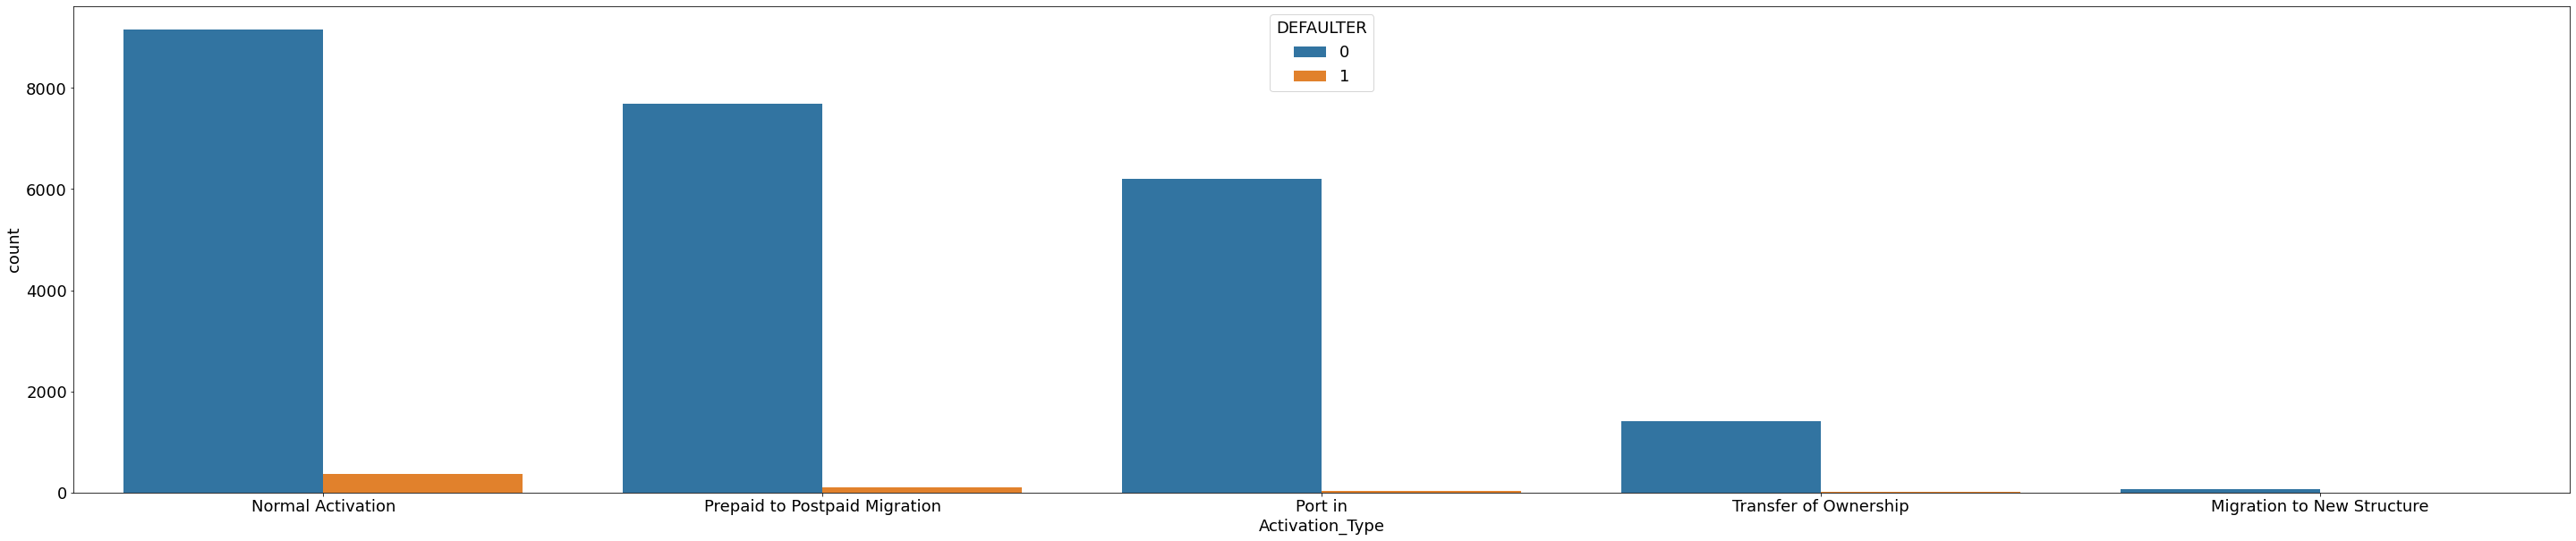

In [18]:
plt.figure(figsize=(50, 10))
ax = sns.countplot(x="Activation_Type", hue="DEFAULTER", data=dataset)
#plt.savefig('D:/LTE.png')

print(dataset.groupby('DEFAULTER')['Activation_Type'].value_counts())

### Data Pre-processing

#### <a style="color:blue;">Clean the data</a>

In [19]:
# Convert ? to NA for PAY_CHANNEL_6MTHS
dataset['PAY_CHANNEL_6MTHS'] = dataset['PAY_CHANNEL_6MTHS'].replace(to_replace=['?'], value=['NA'])

In [20]:
# Convert ? to unspecifie for GENDER
dataset['Gender'] = dataset['Gender'].replace(to_replace=['?'], value=['Unspecifie'])

In [21]:
# Convert ? to others for RACE
dataset['Race'] = dataset['Race'].replace(to_replace=['?'], value=['Others'])

In [22]:
# Standardize the state name for STATE
dataset['State'] = dataset['State'].replace(to_replace=['JOHORE'], value=['JOHOR'])
dataset['State'] = dataset['State'].replace(to_replace=['PULAU PINANG'], value=['PENANG'])
dataset['State'] = dataset['State'].replace(to_replace=['NEGERI SEMBILAN'], value=['N SEMBILAN'])
dataset['State'] = dataset['State'].replace(to_replace=['MALACCA'], value=['MELAKA'])
dataset['State'] = dataset['State'].replace(to_replace=['WILAYAH PERSEKUTUAN'], value=['KLANG VALLEY'])
dataset['State'] = dataset['State'].replace(to_replace=['SELANGOR'], value=['KLANG VALLEY'])
dataset['State'] = dataset['State'].replace(to_replace=['SEREMBAN/MELAKA'], value=['N SEMBILAN'])

#### <a style="color:blue;">Dummy, Input (X) and Target (Y)</a>

In [23]:
# Seperate the data into target column 
Y = dataset['DEFAULTER']

# Seperate the data into Numerical and Categorical Data
numerical = [i for i in dataset.columns if dataset[i].dtypes != 'object' and i != 'DEFAULTER']
categorical = [i for i in dataset.columns if dataset[i].dtypes == 'object' and i != 'DEFAULTER']

# Numerical and Categorical data in dataframe
Xnumerical = dataset[numerical]
categorical= dataset[categorical] 

# Categorical variabes with > 2 classes | One hot encoder
# Xcategorical = pd.get_dummies(categorical, columns= [i for i in categorical.columns if categorical[i].dtypes=='object'],drop_first=False)

# Merge categorical and numerical
# X = pd.merge(Xnumerical, Xcategorical, left_index=True, right_index=True, how="left")
Xnumerical.head()

,TENURE,VO_DAYS_LASTCALLIN,HS_LOSTORSTOLEN3M_IND,DUN_AUTO_N6,DUN_CRLIMIT_N6,VAS_AVG3M,ARPU_AVG3M,VOICE_USG_AVG3M,DATA_USG_AVG3M,ACTIVE_LINES_CNT,AVG_ACTIVE_DAYS,OPEN_AMT,LATE_PYMT_CNT,Age
ID,,,,,,,,,,,,,,
1,150.2,91,0,0,0,0.00,0.00,0,0.00,1,0,0.00,0,54
2,53.5,1,0,0,0,0.00,51.73,16686,58.21,1,30,0.00,1,36
3,25.5,2,0,0,0,19.97,108.90,2405,105.25,1,30,119.82,2,47
4,144.5,0,0,0,0,10.05,189.21,18407,0.77,5,28,344.52,0,51
5,39.9,91,1,2,1,0.00,5.60,94,0.02,1,24,5.30,4,53


#### <a style="color:blue;">Correlation Matrix Heatmap</a>

<AxesSubplot:>

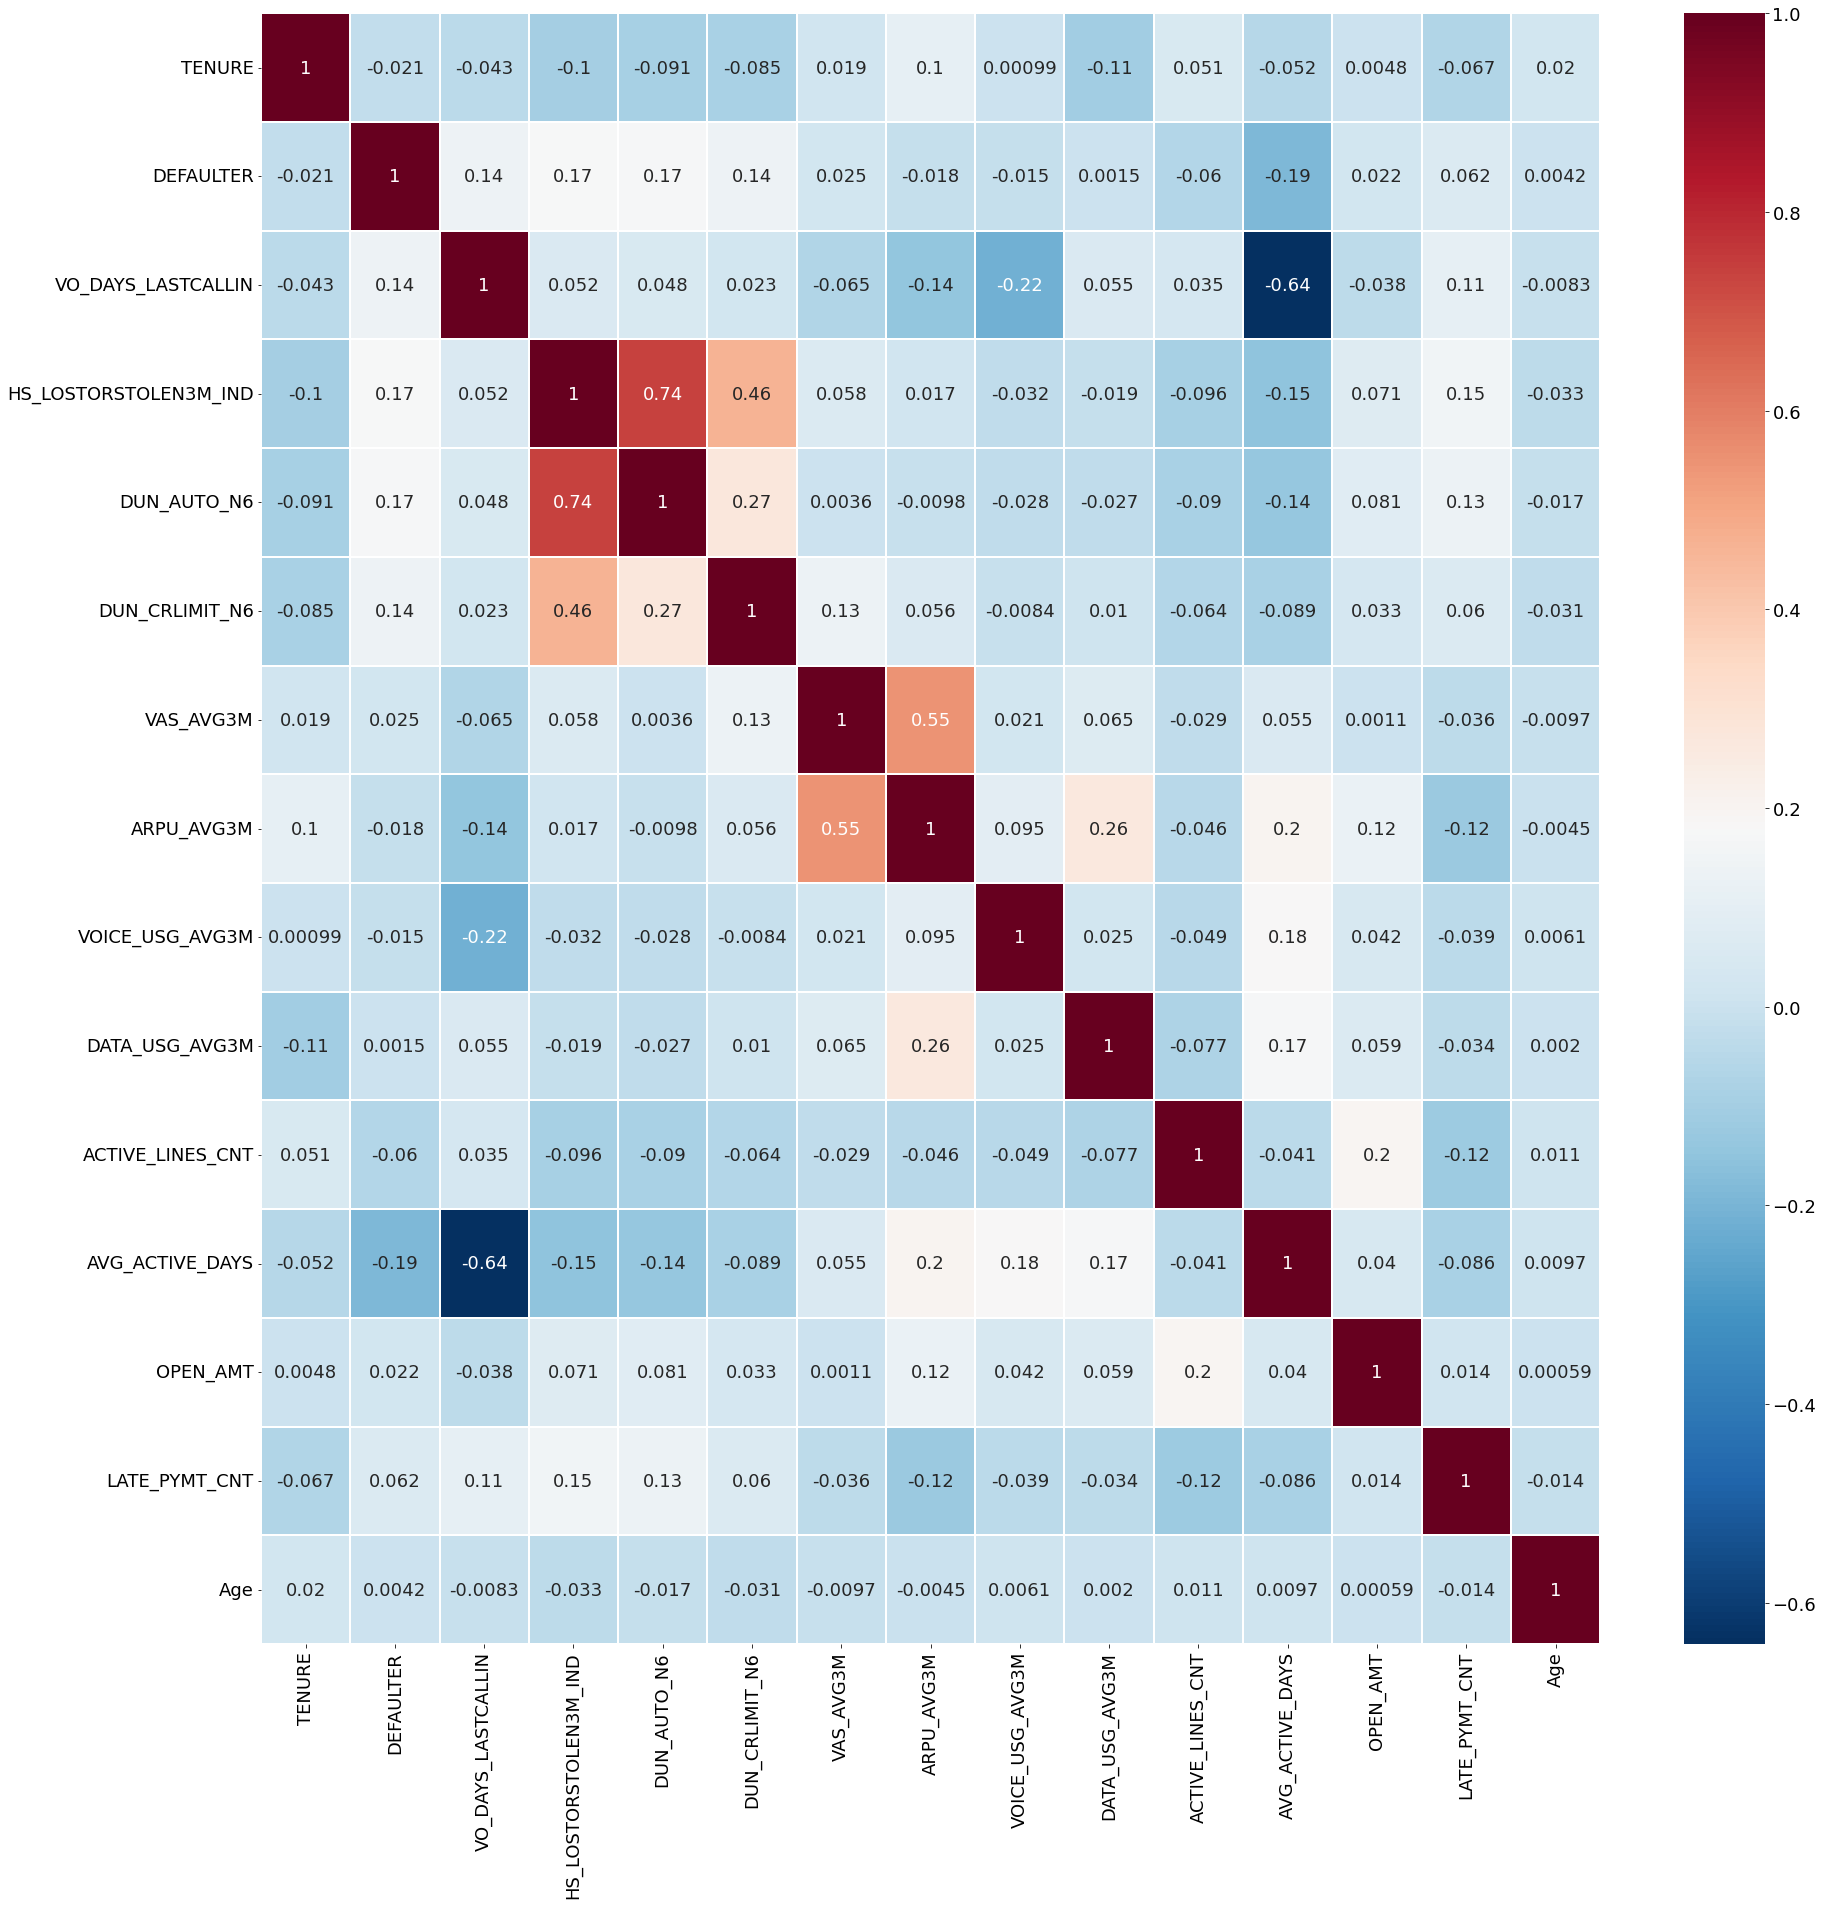

In [24]:
# Correlation Matrix Heatmap
pearsoncorr = dataset.corr(method='pearson')
pearsoncorr = pearsoncorr[((pearsoncorr >= .5) | (pearsoncorr <= -.5)) & (pearsoncorr !=1.000)]
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(method='pearson'), 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.4)

Correlation > 0.3: 


HS_LOSTORSTOLEN3M_IND    0.739818
DUN_AUTO_N6              0.739818
VO_DAYS_LASTCALLIN       0.641626
AVG_ACTIVE_DAYS          0.641626
VAS_AVG3M                0.550528
ARPU_AVG3M               0.550528
DUN_CRLIMIT_N6           0.463898
dtype: float64

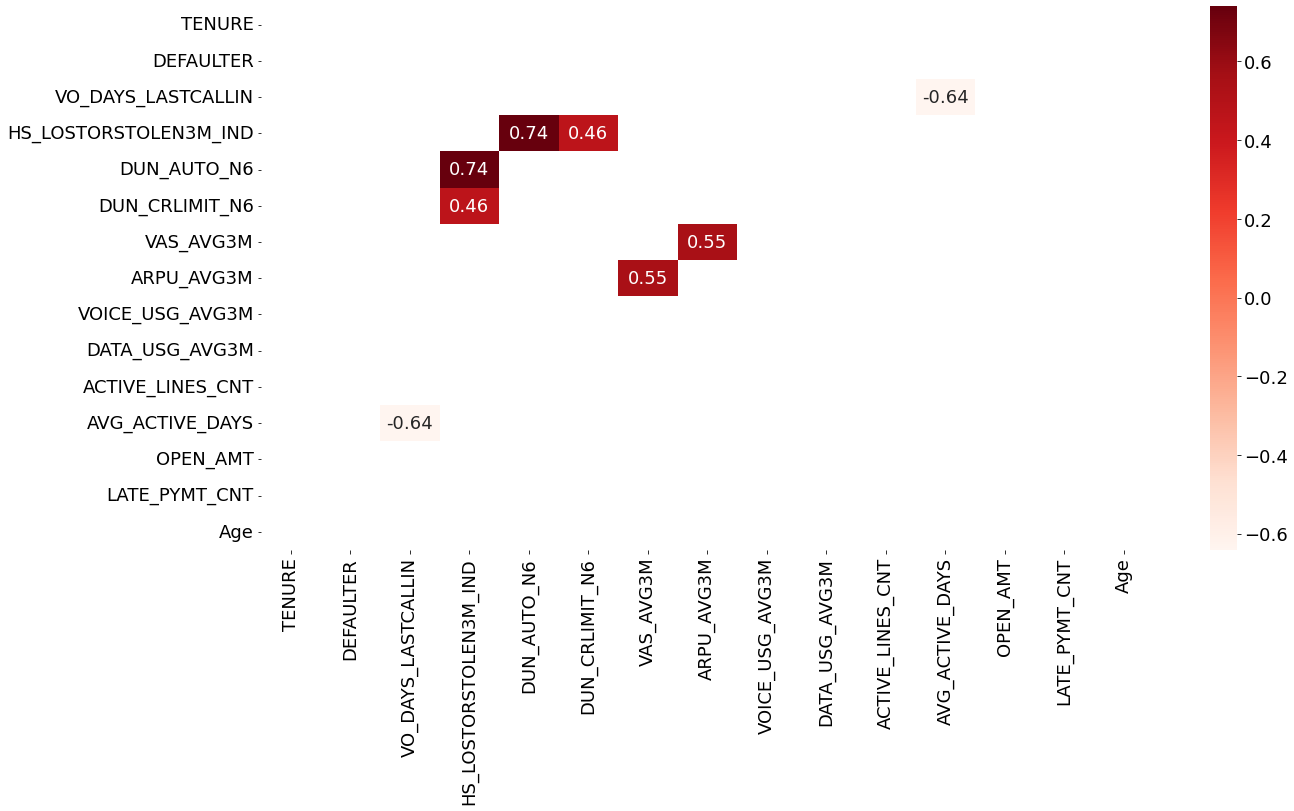

In [25]:
corr = dataset.corr().abs()
corr[corr == 1] = 0
corr_cols = corr.max().sort_values(ascending=False)
print("Correlation > 0.3: ")
display(corr_cols[corr_cols > 0.3])

dfCorr = dataset.corr()
filteredDf = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [26]:
# Drop High Correlation based on heatmap
# Drop Age, Gender, Race, State, Payment method 

X = Xnumerical.drop(['Age','VAS_AVG3M','TENURE'], axis=1)
X

,VO_DAYS_LASTCALLIN,HS_LOSTORSTOLEN3M_IND,DUN_AUTO_N6,DUN_CRLIMIT_N6,ARPU_AVG3M,VOICE_USG_AVG3M,DATA_USG_AVG3M,ACTIVE_LINES_CNT,AVG_ACTIVE_DAYS,OPEN_AMT,LATE_PYMT_CNT
ID,,,,,,,,,,,
1,91,0,0,0,0.00,0,0.00,1,0,0.00,0
2,1,0,0,0,51.73,16686,58.21,1,30,0.00,1
3,2,0,0,0,108.90,2405,105.25,1,30,119.82,2
4,0,0,0,0,189.21,18407,0.77,5,28,344.52,0
5,91,1,2,1,5.60,94,0.02,1,24,5.30,4
...,...,...,...,...,...,...,...,...,...,...,...
24996,0,0,0,0,50.00,48164,6.11,4,30,-0.23,0
24997,0,0,0,0,21.64,1877,20.35,1,30,0.00,0
24998,2,1,1,0,89.50,19392,0.05,3,26,165.80,2


#### <a style="color:blue;">Train Test Split</a>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# Check class distribution 
train = len(y_train[y_train==0])
test = len(y_test[y_test==0])

print('>Train: 0=%d, Test: 0=%d' %(train, test))

>Train: 0=17155, Test: 0=7348


#### <a style="color:blue;">Feature Scaling</a>

### Model Building

#### <a style="color:blue;">Logistic Regression</a>

In [28]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

# Predict_proba will give the probability value of y being 0 or 1.
lr_train_prob = lr.predict_proba(X_train)
lr_test_prob = lr.predict_proba(X_test)

# Predict will give output like 0,1.
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#### <a style="color:blue;">Decision Tree</a>

In [29]:
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(X_train,y_train)

# Parameters
dt_train_pred= dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_train_prob= dt.predict_proba(X_train)
dt_test_prob = dt.predict_proba(X_test)

#### <a style="color:blue;">Random Forest</a>

In [30]:
rf = RandomForestClassifier(max_depth = 5, random_state = 42)
rf.fit(X_train,y_train)

# Parameters
rf_train_pred= rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_train_prob= rf.predict_proba(X_train)
rf_test_prob = rf.predict_proba(X_test)

#### <a style="color:blue;">Gradient Boost</a>

In [31]:
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train,y_train)

# Parameters
GBC_train_pred= GBC.predict(X_train)
GBC_test_pred = GBC.predict(X_test)
GBC_train_prob= GBC.predict_proba(X_train)
GBC_test_prob = GBC.predict_proba(X_test)

### Model Evaluation

#### <a style="color:blue;">AUC Score</a>
- Measure of ability of the model to classify between class

In [32]:
# Logistic Regresion
model_roc_auc_train_1 = roc_auc_score(y_train, lr_train_prob[:,1]) 
#fpr,tpr,thresholds = roc_curve(y_train, lr_train_prob[:,1])
model_roc_auc_test_1 = roc_auc_score(y_test, lr_test_prob[:,1]) 
#fpr,tpr,thresholds = roc_curve(y_test, lr_test_prob[:,1])
print ("Logistics Regression")
print ("Area under curve (train): ", model_roc_auc_train_1)
print ("Area under curve (test): ", model_roc_auc_test_1, "\n")

# Decision Tree
model_roc_auc_train_2 = roc_auc_score(y_train, dt_train_prob[:,1]) 
model_roc_auc_test_2 = roc_auc_score(y_test, dt_test_prob[:,1]) 
print ("Decision Tree")
print ("Area under curve (train): ", model_roc_auc_train_2)
print ("Area under curve (test): ", model_roc_auc_test_2, "\n")

# Random Forest
model_roc_auc_train_3 = roc_auc_score(y_train, rf_train_prob[:,1]) 
model_roc_auc_test_3 = roc_auc_score(y_test, rf_test_prob[:,1]) 
print ("Random Forest")
print ("Area under curve (train): ", model_roc_auc_train_3)
print ("Area under curve (test): ", model_roc_auc_test_3, "\n")

# Gradient Boost 
model_roc_auc_train_4 = roc_auc_score(y_train, GBC_train_prob[:,1]) 
model_roc_auc_test_4 = roc_auc_score(y_test, GBC_test_prob[:,1]) 
print ("Gradient Boost ")
print ("Area under curve (train): ", model_roc_auc_train_4)
print ("Area under curve (test): ", model_roc_auc_test_4, "\n")

Logistics Regression
Area under curve (train):  0.7541915780669853
Area under curve (test):  0.7685290304558348 

Decision Tree
Area under curve (train):  0.874861176232053
Area under curve (test):  0.841208133971292 

Random Forest
Area under curve (train):  0.9304475392732081
Area under curve (test):  0.8836570280491648 

Gradient Boost 
Area under curve (train):  0.9459745120153418
Area under curve (test):  0.8814992622410681 



#### <a style="color:blue;">ROC Curve</a>
- Visualize the performance of classification models on how well different values of prediction probability output

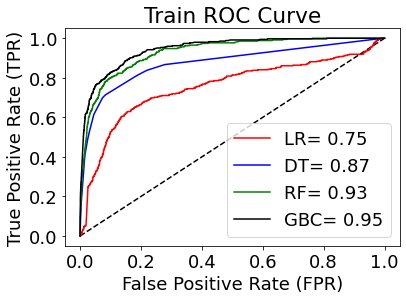

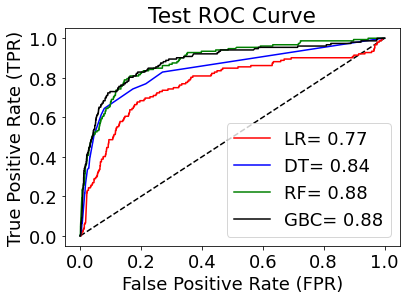

In [33]:
# Logistic Regression 
# Decision Tree 
# Random Forest 
# Gradient Boost 
# XG Boost 

# Train 
fpr_1b,tpr_1b,thresholds_1b = roc_curve(y_train, lr_train_prob[:,1])
fpr_2b,tpr_2b,thresholds_2b = roc_curve(y_train, dt_train_prob[:,1])
fpr_3b,tpr_3b,thresholds_3b = roc_curve(y_train, rf_train_prob[:,1])
fpr_4b,tpr_4b,thresholds_4b = roc_curve(y_train, GBC_train_prob[:,1])
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_1b, tpr_1b, label="LR= "+ str(round(model_roc_auc_train_1,2)), color = "r")
plt.plot(fpr_2b, tpr_2b, label='DT= '+ str(round(model_roc_auc_train_2,2)),color = "b")
plt.plot(fpr_3b, tpr_3b, label='RF= '+ str(round(model_roc_auc_train_3,2)),color = "g")
plt.plot(fpr_4b, tpr_4b, label='GBC= '+ str(round(model_roc_auc_train_4,2)),color = "black")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.title('Train ROC Curve')
plt.savefig('Train ROC Curve.png')
plt.show()


# Test 
fpr_1a,tpr_1a,thresholds_1a = roc_curve(y_test, lr_test_prob[:,1])
fpr_2a,tpr_2a,thresholds_2a = roc_curve(y_test, dt_test_prob[:,1])
fpr_3a,tpr_3a,thresholds_3a = roc_curve(y_test, rf_test_prob[:,1])
fpr_4a,tpr_4a,thresholds_4a = roc_curve(y_test, GBC_test_prob[:,1])
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_1a, tpr_1a, label='LR= '+ str(round(model_roc_auc_test_1,2)),color = "r")
plt.plot(fpr_2a, tpr_2a, label='DT= '+ str(round(model_roc_auc_test_2,2)),color = "b")
plt.plot(fpr_3a, tpr_3a, label='RF= '+ str(round(model_roc_auc_test_3,2)),color = "g")
plt.plot(fpr_4a, tpr_4a, label='GBC= '+ str(round(model_roc_auc_test_4,2)),color = "black")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.title('Test ROC Curve')
plt.savefig('Test ROC Curve.png')
plt.show()

#### <a style="color:blue;">K-fold Cross Validation</a>

In [34]:
# Logistic Regression
kfold_1 = model_selection.KFold(n_splits=10)
modelCV_1 =  lr
scoring_1 = 'roc_auc'
results_1 = model_selection.cross_val_score(modelCV_1, X_train, y_train, cv=kfold_1, scoring=scoring_1)
print("Logistics Regresssion")
print("10-fold cross validation average AUC-ROC: %.3f" % (results_1.mean()),"\n")

# Decision Tree
kfold_2 = model_selection.KFold(n_splits=10)
modelCV_2 =  dt
scoring_2 = 'roc_auc'
results_2 = model_selection.cross_val_score(modelCV_2, X_train, y_train, cv=kfold_2, scoring=scoring_2)
print ("Decision Tree")
print("10-fold cross validation average AUC-ROC: %.3f" % (results_2.mean()),"\n")

# Random Forest
kfold_3= model_selection.KFold(n_splits=10)
modelCV_3 =  rf
scoring_3 = 'roc_auc'
results_3 = model_selection.cross_val_score(modelCV_3, X_train, y_train, cv=kfold_3, scoring=scoring_3)
print("Random Forest")
print("10-fold cross validation average AUC-ROC: %.3f" % (results_3.mean()),"\n")

# Gradient Boost
kfold_4= model_selection.KFold(n_splits=10)
modelCV_4 =  GBC
scoring_4 = 'roc_auc'
results_4 = model_selection.cross_val_score(modelCV_4, X_train, y_train, cv=kfold_4, scoring=scoring_4)
print("Gradient Boost")
print("10-fold cross validation average AUC-ROC: %.3f" % (results_4.mean()),"\n")

Logistics Regresssion
10-fold cross validation average AUC-ROC: 0.771 

Decision Tree
10-fold cross validation average AUC-ROC: 0.833 

Random Forest
10-fold cross validation average AUC-ROC: 0.899 

Gradient Boost
10-fold cross validation average AUC-ROC: 0.902 



#### <a style="color:blue;">Confusion Matrix & Classification Report</a>

Results for Logistic Regression:
Accuracy: 0.9795 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7348
           1       0.00      0.00      0.00       152

    accuracy                           0.98      7500
   macro avg       0.49      0.50      0.49      7500
weighted avg       0.96      0.98      0.97      7500



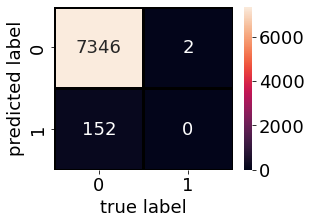

Results for Decision Tree:
Accuracy: 0.9772 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7348
           1       0.15      0.03      0.04       152

    accuracy                           0.98      7500
   macro avg       0.56      0.51      0.52      7500
weighted avg       0.96      0.98      0.97      7500



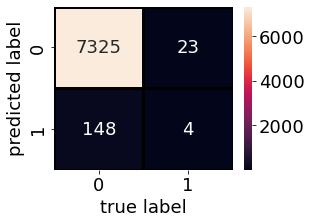

Results for Random Forest:
Accuracy: 0.9797 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7348
           1       0.00      0.00      0.00       152

    accuracy                           0.98      7500
   macro avg       0.49      0.50      0.49      7500
weighted avg       0.96      0.98      0.97      7500



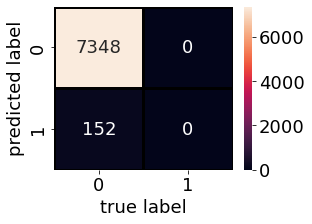

Results for Gradient Boosting:
Accuracy: 0.9783 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7348
           1       0.26      0.04      0.07       152

    accuracy                           0.98      7500
   macro avg       0.62      0.52      0.53      7500
weighted avg       0.97      0.98      0.97      7500



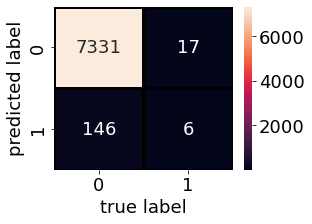

In [35]:
# Logistic Regression 
print("Results for Logistic Regression:")
print("Accuracy:",round(accuracy_score(y_test, lr_test_pred),4), '\n')
lr_report = classification_report(y_test,lr_test_pred)
print(lr_report)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_test_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


# Decision Tree
print("Results for Decision Tree:")
print("Accuracy:",round(accuracy_score(y_test, dt_test_pred),4), '\n')
dt_report = classification_report(y_test,dt_test_pred)
print(dt_report)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, dt_test_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


# Random Forest
print("Results for Random Forest:")
print("Accuracy:",round(accuracy_score(y_test, rf_test_pred),4), '\n')
rf_report = classification_report(y_test,rf_test_pred)
print(rf_report)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, rf_test_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


# Gradient Boosting
print("Results for Gradient Boosting:")
print("Accuracy:",round(accuracy_score(y_test, GBC_test_pred),4), '\n')
GBC_report = classification_report(y_test,GBC_test_pred)
print(GBC_report)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, GBC_test_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### <a style="color:blue;">Lift and Gain Charts</a>

In [36]:
# lift score function to find the score at specific deciles
def lift_score(y_proba, y_true, decile):
    tf = pd.DataFrame(data = {'y_proba':y_proba,'y_true': y_true})
    tf = tf.sort_values(by='y_proba', ascending=False)
    
    # total positive values in entire base
    val1 = tf.loc[tf['y_true']==1].shape[0]/tf.shape[0]
    
    # total positive in relative base
    tf1 = tf.head(int(decile*tf.shape[0]))
    val2 = tf1.loc[tf1['y_true']==1].shape[0]/tf1.shape[0]
    
    return round(val2/val1,2)

Logistic Regression:
Lift score for 0.1: 4.61 
Lift score for 0.2: 3.39 
Lift score for 0.3: 2.48 
Lift score for 0.4: 2.02


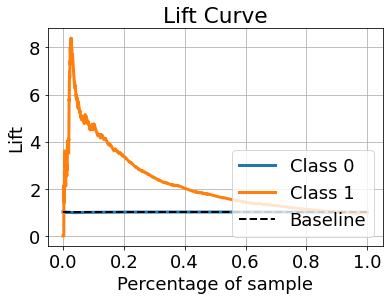

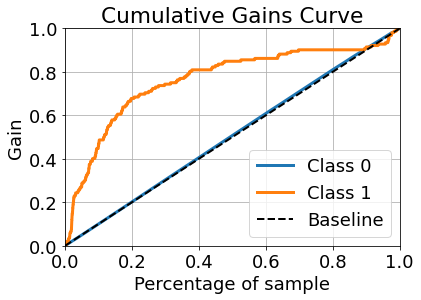

Decision Tree:
Lift score for 0.1: 6.64 
Lift score for 0.2: 3.78 
Lift score for 0.3: 2.76 
Lift score for 0.4: 2.15


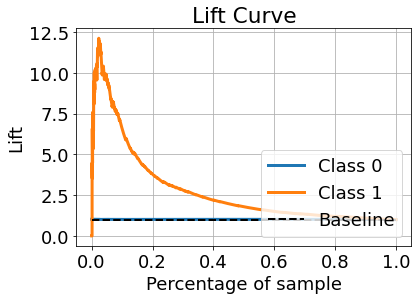

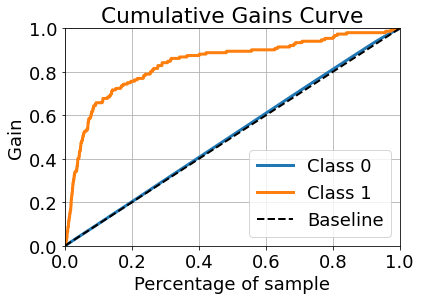

Random Forest:
Lift score for 0.1: 6.45 
Lift score for 0.2: 4.05 
Lift score for 0.3: 2.87 
Lift score for 0.4: 2.32


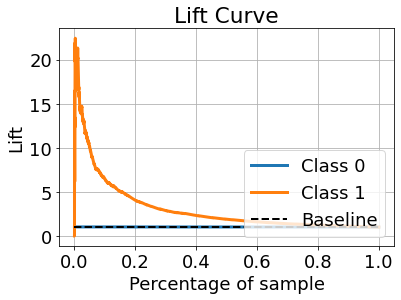

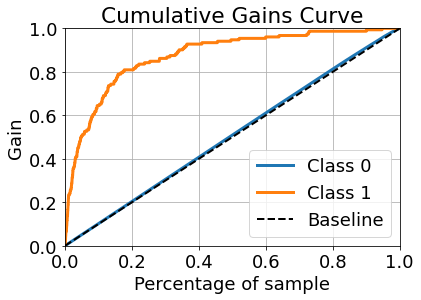

Gradient Boost:
Lift score for 0.1: 7.11 
Lift score for 0.2: 4.11 
Lift score for 0.3: 2.96 
Lift score for 0.4: 2.3


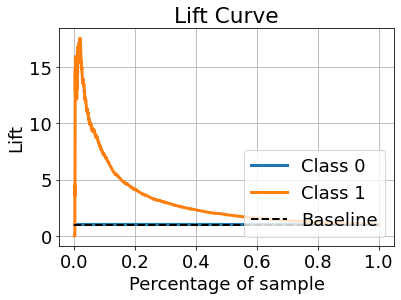

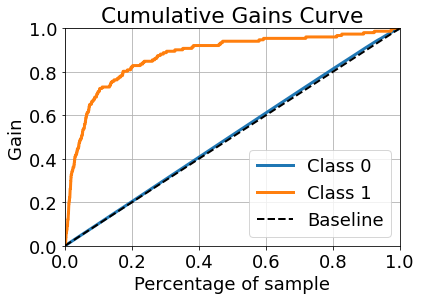

In [37]:
# Install scikit-plot
!pip install scikit-plot
import scikitplot as skplt

# Logistic Regression 
print('Logistic Regression:')
print('Lift score for 0.1:', lift_score(lr_test_prob[:,1],y_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(lr_test_prob[:,1],y_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(lr_test_prob[:,1],y_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(lr_test_prob[:,1],y_test,0.4))
skplt.metrics.plot_lift_curve(y_test, lr_test_prob)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, lr_test_prob)
plt.show()


# Decision Tree
print('Decision Tree:')
print('Lift score for 0.1:', lift_score(dt_test_prob[:,1],y_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(dt_test_prob[:,1],y_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(dt_test_prob[:,1],y_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(dt_test_prob[:,1],y_test,0.4))
skplt.metrics.plot_lift_curve(y_test, dt_test_prob)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, dt_test_prob)
plt.show()


# Random Forest
print('Random Forest:')
print('Lift score for 0.1:', lift_score(rf_test_prob[:,1],y_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(rf_test_prob[:,1],y_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(rf_test_prob[:,1],y_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(rf_test_prob[:,1],y_test,0.4))
skplt.metrics.plot_lift_curve(y_test, rf_test_prob)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, rf_test_prob)
plt.show()


# Gradient Boost
print('Gradient Boost:')
print('Lift score for 0.1:', lift_score(GBC_test_prob[:,1],y_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(GBC_test_prob[:,1],y_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(GBC_test_prob[:,1],y_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(GBC_test_prob[:,1],y_test,0.4))
skplt.metrics.plot_lift_curve(y_test, GBC_test_prob)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, GBC_test_prob)
plt.show()

#### <a style="color:blue;">Feature Importance</a>

#### <a style="color:blue;">Logistic Regression</a>

In [38]:
feature_importances_lr = pd.concat([pd.DataFrame((X_train).columns, columns = ["features"]), pd.DataFrame(np.transpose(lr.fit(X_train, y_train).coef_), columns = ["coef"])],axis = 1)
feature_importances_lr = feature_importances_lr.sort_values("coef", ascending = False)
print(feature_importances_lr)

                 features      coef
6          DATA_USG_AVG3M  0.005390
2             DUN_AUTO_N6  0.002574
3          DUN_CRLIMIT_N6  0.001482
9                OPEN_AMT  0.001361
1   HS_LOSTORSTOLEN3M_IND  0.001206
5         VOICE_USG_AVG3M  0.000003
4              ARPU_AVG3M -0.001274
10          LATE_PYMT_CNT -0.007133
7        ACTIVE_LINES_CNT -0.013048
0      VO_DAYS_LASTCALLIN -0.020158
8         AVG_ACTIVE_DAYS -0.153294


#### <a style="color:blue;">Decision Tree</a>

AVG_ACTIVE_DAYS          0.261221
ARPU_AVG3M               0.152388
DUN_CRLIMIT_N6           0.120643
DATA_USG_AVG3M           0.119700
LATE_PYMT_CNT            0.102722
HS_LOSTORSTOLEN3M_IND    0.078826
ACTIVE_LINES_CNT         0.049928
VOICE_USG_AVG3M          0.046727
DUN_AUTO_N6              0.041499
OPEN_AMT                 0.020378
dtype: float64


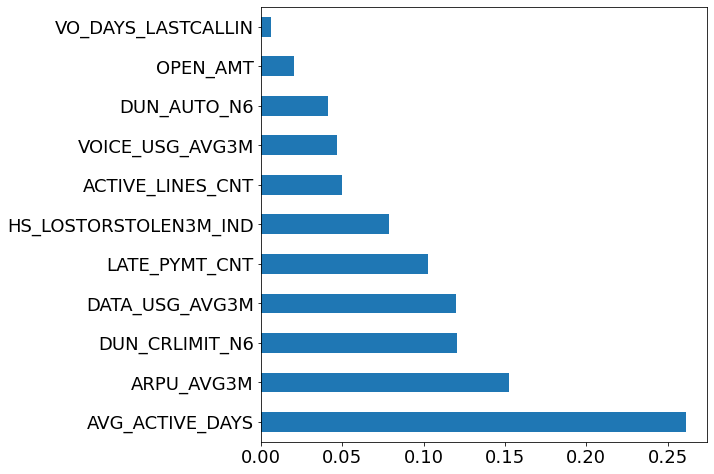

In [39]:
feature_importances_dt = pd.Series(dt.feature_importances_, index=X_train.columns)
print(feature_importances_dt.sort_values(ascending=False).nlargest(10))
feature_importances_dt = feature_importances_dt.nlargest(20).plot(kind='barh' , figsize=(8,8)) 
#plt.savefig('DT Feature.png')

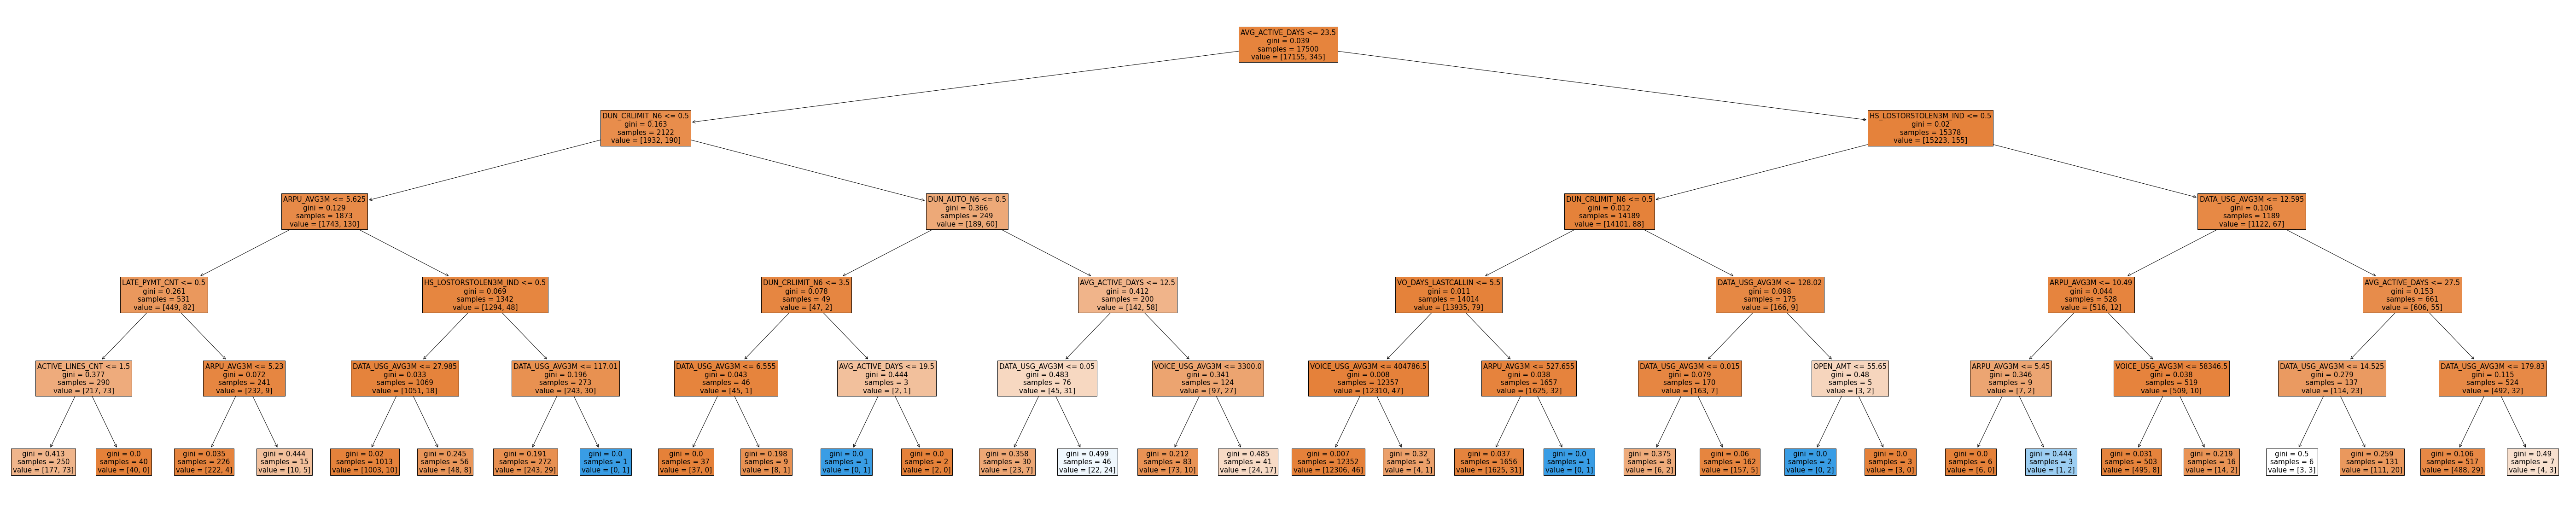

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,20))
plot_tree(dt, feature_names = X_train.columns, filled=True, fontsize=15)
plt.savefig('DT.png')
plt.show()

#### <a style="color:blue;">Random Forest</a>

AVG_ACTIVE_DAYS          0.210252
ARPU_AVG3M               0.128378
DATA_USG_AVG3M           0.099363
DUN_CRLIMIT_N6           0.096769
DUN_AUTO_N6              0.086289
LATE_PYMT_CNT            0.074917
OPEN_AMT                 0.073701
VOICE_USG_AVG3M          0.070474
HS_LOSTORSTOLEN3M_IND    0.068867
VO_DAYS_LASTCALLIN       0.049826
dtype: float64


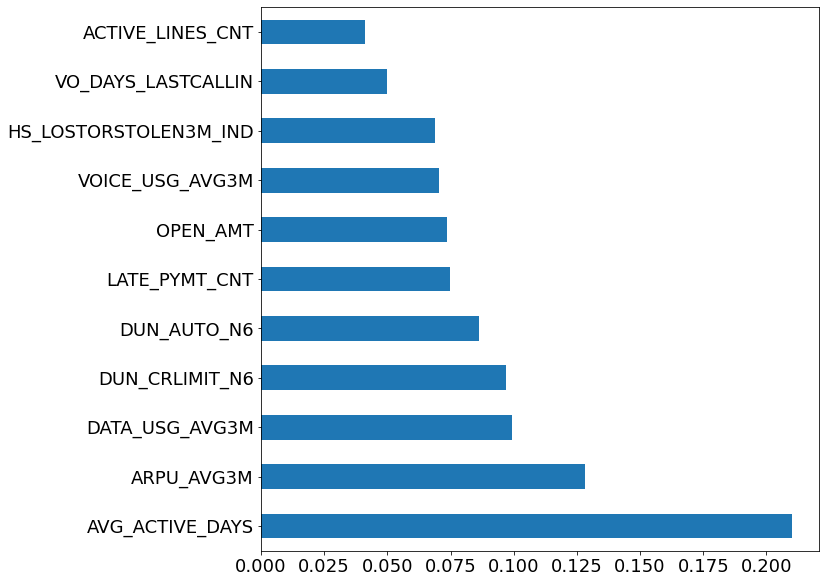

In [41]:
feature_importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances_rf.sort_values(ascending=False).nlargest(10))
feature_importances_rf = feature_importances_rf.nlargest(20).plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('RF Feature.png')

#### <a style="color:blue;">Gradient Boosting</a>

AVG_ACTIVE_DAYS          0.248939
DATA_USG_AVG3M           0.136733
OPEN_AMT                 0.116280
ARPU_AVG3M               0.102729
VOICE_USG_AVG3M          0.075973
DUN_AUTO_N6              0.072213
DUN_CRLIMIT_N6           0.068723
ACTIVE_LINES_CNT         0.049271
LATE_PYMT_CNT            0.045379
HS_LOSTORSTOLEN3M_IND    0.045329
dtype: float64


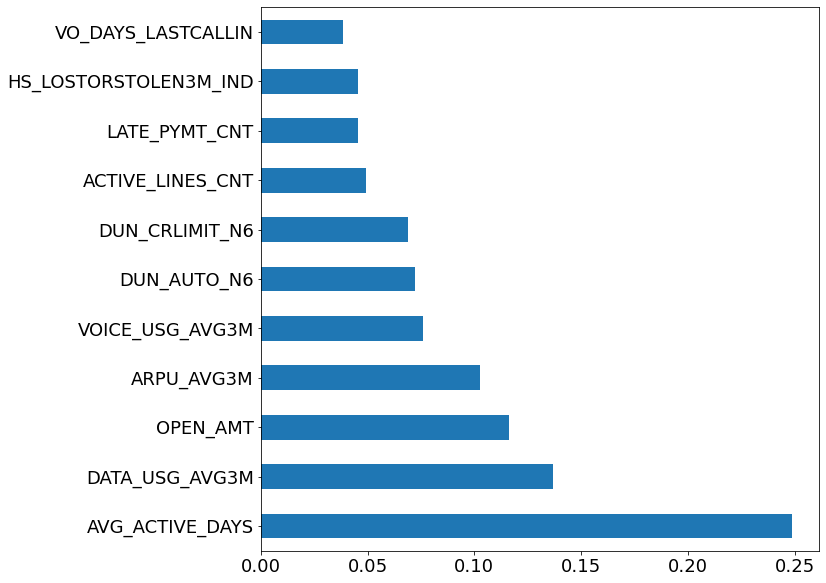

In [42]:
feature_importances_GBC = pd.Series(GBC.feature_importances_, index=X_train.columns)
print(feature_importances_GBC.sort_values(ascending=False).nlargest(10))
feature_importances_GBC = feature_importances_GBC.nlargest(20).plot(kind='barh' , figsize=(10,10)) 
#plt.savefig('GB Feature.png')

### OOT Validation

#### <a style="color:blue;">Import Test set and Full set</a>

In [47]:
# Import dataset | Test set  
OOT_dataset = pd.read_excel('Dataset_30k.xlsx')
OOT_dataset = OOT_dataset.set_index(OOT_dataset['LN_SUBS_ID'])
OOT_dataset = OOT_dataset.drop(columns = 'LN_SUBS_ID')

# Data Cleaning 
OOT_dataset['PAY_CHANNEL_6MTHS'] = OOT_dataset['PAY_CHANNEL_6MTHS'].replace(to_replace=['?'], value=['NA'])
OOT_dataset['PAY_CHANNEL_6MTHS'] = OOT_dataset['PAY_CHANNEL_6MTHS'].replace(to_replace=['?'], value=['NA'])
OOT_dataset['SUBS_GENDER'] = OOT_dataset['SUBS_GENDER'].replace(to_replace=['?'], value=['Unspecifie'])
OOT_dataset['SUBS_RACE'] = OOT_dataset['SUBS_RACE'].replace(to_replace=['?'], value=['Others'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['JOHORE'], value=['JOHOR'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['PULAU PINANG'], value=['PENANG'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['NEGERI SEMBILAN'], value=['N SEMBILAN'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['MALACCA'], value=['MELAKA'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['WILAYAH PERSEKUTUAN'], value=['KLANG VALLEY'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['SELANGOR'], value=['KLANG VALLEY'])
OOT_dataset['SUBS_COMM_STT'] = OOT_dataset['SUBS_COMM_STT'].replace(to_replace=['SEREMBAN/MELAKA'], value=['N SEMBILAN'])

# Seperate the data into target column 
OOT_Y = OOT_dataset['DEFAULTER_IND']

# Seperate the data into Numerical and Categorical Data
OOT_numerical = [i for i in OOT_dataset.columns if OOT_dataset[i].dtypes != 'object' and i != 'DEFAULTER_IND']
OOT_categorical = [i for i in OOT_dataset.columns if OOT_dataset[i].dtypes == 'object' and i != 'DEFAULTER_IND']

# Numerical and Categorical data in dataframe
OOT_Xnumerical = OOT_dataset[OOT_numerical]
OOT_categorical= OOT_dataset[OOT_categorical] 

# Categorical variabes with > 2 classes | One hot encoder
# OOT_Xcategorical = pd.get_dummies(OOT_categorical, columns= [i for i in OOT_categorical.columns if OOT_categorical[i].dtypes=='object'],drop_first=False)

# Merge categorical and numerical
# OOT_X = pd.merge(OOT_Xnumerical, OOT_Xcategorical, on =['LN_SUBS_ID'])

# Drop unused columns 
OOT_X = OOT_Xnumerical
OOT_X = OOT_X.drop(['AGE','VAS_AVG3M','CREDIT_LMT_CHG_N6'], axis=1)
OOT_X

# Standardization --- DO NOT USE THIS WHEN TESTING OR VALIDATING OR SCORING PROD DECILE 
#sc_X = StandardScaler()
#OOT_X_test2 = pd.DataFrame(sc_X.fit_transform(OOT_X))
#OOT_X_test2.columns = OOT_X.columns.values
#OOT_X_test2.index = OOT_X.index.values
#OOT_X_scaler = OOT_X_test2

,VO_DAYS_LASTCALLIN,HS_LOSTORSTOLEN3M_IND,DUN_AUTO_N6,DUN_CRLIMIT_N6,ARPU_AVG3M,VOICE_USG_AVG3M,DATA_USG_AVG3M,ACTIVE_LINES_CNT,AVG_ACTIVE_DAYS,OPEN_AMT,LATE_PYMT_CNT
LN_SUBS_ID,,,,,,,,,,,
1,0,0,0,0,102.52,45975,12.34,3,30,252.20,1
2,1,1,2,2,123.09,821,34.99,1,24,170.35,2
3,1,1,1,0,230.17,127214,75.49,1,30,259.72,0
4,0,0,0,0,223.86,82949,23.22,3,30,0.00,1
5,0,0,0,0,36.45,430,44.57,1,30,-199.38,0
...,...,...,...,...,...,...,...,...,...,...,...
29996,1,0,0,0,100.04,1317,41.12,1,30,0.00,1
29997,8,1,3,0,30.00,1923,20.32,2,19,-0.19,3
29998,5,0,0,0,61.48,9688,17.57,1,30,0.00,1


#### <a style="color:blue;">Check OOT AUC score</a>

In [49]:
# Use the Reloaded Model to calculate the AUC score and predict target values
# Print the accuracy score 
# lr_score = lr_model.score(OOT_X_scaler, OOT_Y)  
# Print("Test score: {0:.2f} %".format(100 * lr_score))  

print ("OOT data AUC score- ")
print ("Logistic Regression AUC score: ", roc_auc_score(OOT_Y, lr.predict_proba(OOT_X)[:,1]))
print ("Decision Tree AUC score: ", roc_auc_score(OOT_Y, rf.predict_proba(OOT_X)[:,1]))
print ("Random Forest AUC score: ", roc_auc_score(OOT_Y, dt.predict_proba(OOT_X)[:,1]))
print ("Gradient Boost AUC score: ", roc_auc_score(OOT_Y, GBC.predict_proba(OOT_X)[:,1]))

OOT data AUC score- 
Logistic Regression AUC score:  0.7430752107925802
Decision Tree AUC score:  0.8604829679595278
Random Forest AUC score:  0.7744262105516744
Gradient Boost AUC score:  0.8680829197783666


### Decile Scoring

#### <a style="color:blue;">Logistic Regression</a>

In [40]:
# Convert to df and map to index (use preditc proba)
lr_train_proba = pd.DataFrame(lr_train_prob,index=X_train.index)
lr_train_proba.shape

# Create probability decile column based on probability in dataframe
lr_train_proba['PROD_DECILE']=pd.qcut(lr_train_proba[1],10,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
lr_df = pd.DataFrame(y_train)
lr_df = lr_df['DEFAULTER_IND']

lr_df2 = pd.DataFrame(lr_train_pred, index = X_train.index)
lr_df2.rename(columns = {0:'PREDICT_DEFAULTER_IND'}, inplace = True)

# Map decile column with defaulter indicator and predicter defaulter indicator 
lr_output = pd.merge(lr_train_proba, lr_df, left_index=True, right_index=True, how="left") 
lr_output_ = pd.merge(lr_output, lr_df2, left_index=True, right_index=True, how="left") 

# Count checking 
#lr_output_count = lr_output_.loc[lr_output_['DEFAULTER_IND'] == 1]
lr_output_.groupby(['PROD_DECILE','DEFAULTER_IND']).count()

#lr_output_count.groupby(['PREDICT_DEFAULTER_IND']).count()
#lr_output_count.groupby(['PROD_DECILE']).nunique()

0      1  PREDICT_DEFAULTER_IND
PROD_DECILE DEFAULTER_IND                                     
0           0              34987  34987                  34987
            1                 13     13                     13
1           0              34984  34984                  34984
            1                 16     16                     16
2           0              34972  34972                  34972
            1                 28     28                     28
3           0              34979  34979                  34979
            1                 21     21                     21
4           0              34972  34972                  34972
            1                 28     28                     28
5           0              34947  34947                  34947
            1                 53     53                     53
6           0              34934  34934                  34934
            1                 66     66                     66
7           0              34901  34901                  34901
            1                 99     99                     99
8           0              34672  34672                  34672
            1                328    328                    328
9           0              33561  33561                  33561
            1               1439   1439                   1439

In [41]:
from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# Derive the probability base and fit and transform 
target = lr_output_.iloc[:,1]
target = target.values.reshape(350000,1)
# est.fit(target)
score_output = est.fit_transform(target)

# Combine the output and defaulter flag to check 
score_output = pd.DataFrame(score_output, index=X_train.index)
score_output.rename(columns = {0:'KMEAN_SCORE'}, inplace = True)
#new_value = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10 }
#score_output.replace({"KMEAN_SCORE": new_value}, inplace = True)
score_output = pd.merge(lr_output_, score_output, left_index=True, right_index=True, how="left") 
#score_output.rename(columns = {0:'0_PROBABILITY', 1:'1_PROBABILITY'}, inplace = True)

# Count checking
score_output.groupby(['KMEAN_SCORE','DEFAULTER_IND']).count()

0       1  PROD_DECILE  PREDICT_DEFAULTER_IND
KMEAN_SCORE DEFAULTER_IND                                                    
0.0         0              309124  309124       309124                 309124
            1                 589     589          589                    589
1.0         0               27590   27590        27590                  27590
            1                 594     594          594                    594
2.0         0                9250    9250         9250                   9250
            1                 727     727          727                    727
3.0         0                1051    1051         1051                   1051
            1                  86      86           86                     86
4.0         0                 371     371          371                    371
            1                  42      42           42                     42
5.0         0                 318     318          318                    318
            1                  32      32           32                     32
6.0         0                 165     165          165                    165
            1                  16      16           16                     16
7.0         0                  25      25           25                     25
            1                   5       5            5                      5
8.0         0                  11      11           11                     11
9.0         0                   4       4            4                      4

#### <a style="color:blue;">Decision Tree</a>

In [43]:
# Convert to df and map to index
dt_train_proba = pd.DataFrame(dt_train_prob,index=X_train.index)
dt_train_proba.shape

# Create probability decile column based on probability in dataframe
dt_train_proba['PROD_DECILE']=pd.qcut(dt_train_proba[1],2,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
dt_df = pd.DataFrame(y_train)
dt_df = dt_df['DEFAULTER_IND']

dt_df2 = pd.DataFrame(dt_train_pred, index = X_train.index)
dt_df2.rename(columns = {0:'PREDICT_DEFAULTER_IND'}, inplace = True)

# Map decile column with defaulter indicator and predicter defaulter indicator 
dt_output = pd.merge(dt_train_proba, dt_df, left_index=True, right_index=True, how="left") 
dt_output_ = pd.merge(dt_output, dt_df2, left_index=True, right_index=True, how="left") 

# Count checking 
dt_output_.groupby(['PROD_DECILE','DEFAULTER_IND']).count()
#??? why only 2 decile in DT 

0       1  PREDICT_DEFAULTER_IND
PROD_DECILE DEFAULTER_IND                                       
0           0              247165  247165                 247165
            1                 203     203                    203
1           0              100744  100744                 100744
            1                1888    1888                   1888

#### <a style="color:blue;">Random Forest</a>

In [44]:
# Convert to df and map to index
rf_train_proba = pd.DataFrame(rf_train_prob,index=X_train.index)
rf_train_proba.shape

# Create probability decile column based on probability in dataframe
rf_train_proba['PROD_DECILE']=pd.qcut(rf_train_proba[1],10,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
rf_df = pd.DataFrame(y_train)
rf_df = rf_df['DEFAULTER_IND']

rf_df2 = pd.DataFrame(rf_train_pred, index = X_train.index)
rf_df2.rename(columns = {0:'PREDICT_DEFAULTER_IND'}, inplace = True)

# Map decile column with defaulter indicator and predicter defaulter indicator 
rf_output = pd.merge(rf_train_proba, rf_df, left_index=True, right_index=True, how="left") 
rf_output_ = pd.merge(rf_output, rf_df2, left_index=True, right_index=True, how="left") 

# Count checking 
rf_output_.groupby(['PROD_DECILE','DEFAULTER_IND']).count()

0      1  PREDICT_DEFAULTER_IND
PROD_DECILE DEFAULTER_IND                                     
0           0              46561  46561                  46561
            1                  3      3                      3
1           0              23571  23571                  23571
            1                  1      1                      1
2           0              34858  34858                  34858
            1                  9      9                      9
3           0              42964  42964                  42964
            1                 22     22                     22
4           0              27161  27161                  27161
            1                 15     15                     15
5           0              34805  34805                  34805
            1                 35     35                     35
6           0              34944  34944                  34944
            1                 56     56                     56
7           0              34882  34882                  34882
            1                120    120                    120
8           0              34752  34752                  34752
            1                241    241                    241
9           0              33411  33411                  33411
            1               1589   1589                   1589

#### <a style="color:blue;">Gradient Boosting</a>

In [45]:
# Convert to df and map to index
GBC_train_proba = pd.DataFrame(GBC_train_prob,index=X_train.index)
GBC_train_proba.shape

# Create probability decile column based on probability in dataframe
GBC_train_proba['PROD_DECILE']=pd.qcut(GBC_train_proba[1],10,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
GBC_df = pd.DataFrame(y_train)
GBC_df = GBC_df['DEFAULTER_IND']

GBC_df2 = pd.DataFrame(GBC_train_pred, index = X_train.index)
GBC_df2.rename(columns = {0:'PREDICT_DEFAULTER_IND'}, inplace = True)

# Map decile column with defaulter indicator and predicter defaulter indicator 
GBC_output = pd.merge(GBC_train_proba, GBC_df, left_index=True, right_index=True, how="left") 
GBC_output_ = pd.merge(GBC_output, GBC_df2, left_index=True, right_index=True, how="left") 

# Count checking 
GBC_output_.groupby(['PROD_DECILE','DEFAULTER_IND']).count()

0      1  PREDICT_DEFAULTER_IND
PROD_DECILE DEFAULTER_IND                                     
0           0              34993  34993                  34993
            1                  7      7                      7
1           0              34994  34994                  34994
            1                  6      6                      6
2           0              35030  35030                  35030
            1                  4      4                      4
3           0              34953  34953                  34953
            1                 13     13                     13
4           0              34996  34996                  34996
            1                 18     18                     18
5           0              35041  35041                  35041
            1                 24     24                     24
6           0              34887  34887                  34887
            1                 34     34                     34
7           0              34910  34910                  34910
            1                 90     90                     90
8           0              34809  34809                  34809
            1                191    191                    191
9           0              33296  33296                  33296
            1               1704   1704                   1704

### Top9 Variable Model

In [47]:
# Declare X and Y target from similar feature importance 
Top10_Y = dataset['DEFAULTER_IND']
Top10_X = dataset[['LATE_PYMT_CNT', 'HS_LOSTORSTOLEN3M_IND','DUN_AUTO_N6','DUN_CRLIMIT_N6','VO_DAYS_LASTCALLIN','VO_ZERO_OUT_AVG','ACTIVE_LINES_CNT','AUTOBILLING_IND','LAST_DATA_USG_DAYS','VAS_AVG3M']]

In [48]:
# Train test split 
TopX_train, TopX_test, TopY_train, TopY_test = train_test_split(Top10_X, Top10_Y, test_size = 0.3)

# Check class distribution 
Top_Y_train = len(TopY_train[TopY_train==0])
Top_Y_test = len(TopY_test[TopY_test==0])
print('>Train: 0=%d, Test: 0=%d' %(Top_Y_train, Top_Y_test))

>Train: 0=347864, Test: 0=149097


In [49]:
# Model Building 
lr = LogisticRegression(solver = 'liblinear', random_state=42)
lr.fit(TopX_train,TopY_train)
# Parameters
Toplr_train_prob = lr.predict_proba(TopX_train)
Toplr_test_prob = lr.predict_proba(TopX_test)
Toplr_train_pred = lr.predict(TopX_train)
Toplr_test_pred = lr.predict(TopX_test)

dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(TopX_train,TopY_train)
# Parameters
Topdt_train_pred= dt.predict(TopX_train)
Topdt_test_pred = dt.predict(TopX_test)
Topdt_train_prob= dt.predict_proba(TopX_train)
Topdt_test_prob = dt.predict_proba(TopX_test)

rf = RandomForestClassifier(max_depth = 5, random_state = 42)
rf.fit(TopX_train,TopY_train)
# Parameters
Toprf_train_pred= rf.predict(TopX_train)
Toprf_test_pred = rf.predict(TopX_test)
Toprf_train_prob= rf.predict_proba(TopX_train)
Toprf_test_prob = rf.predict_proba(TopX_test)

GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(TopX_train,TopY_train)
# Parameters
TopGBC_train_pred= GBC.predict(TopX_train)
TopGBC_test_pred = GBC.predict(TopX_test)
TopGBC_train_prob= GBC.predict_proba(TopX_train)
TopGBC_test_prob = GBC.predict_proba(TopX_test)

XGB = XGBClassifier(max_depth = 4, random_state=42)
XGB.fit(TopX_train,TopY_train)
# Parameters
TopXGB_train_pred= XGB.predict(TopX_train)
TopXGB_test_pred = XGB.predict(TopX_test)
TopXGB_train_prob= XGB.predict_proba(TopX_train)
TopXGB_test_prob = XGB.predict_proba(TopX_test)

In [50]:
# Check AUC score
# Logistic Regresion
Topmodel_roc_auc_train_1 = roc_auc_score(TopY_train, Toplr_train_prob[:,1]) 
Topmodel_roc_auc_test_1 = roc_auc_score(TopY_test, Toplr_test_prob[:,1]) 
print ("Logistics Regression")
print ("Area under curve (train): ", Topmodel_roc_auc_train_1)
print ("Area under curve (test): ", Topmodel_roc_auc_test_1, "\n")

# Decision Tree
Topmodel_roc_auc_train_2 = roc_auc_score(TopY_train, Topdt_train_prob[:,1]) 
Topmodel_roc_auc_test_2 = roc_auc_score(TopY_test, Topdt_test_prob[:,1]) 
print ("Decision Tree")
print ("Area under curve (train): ", Topmodel_roc_auc_train_2)
print ("Area under curve (test): ", Topmodel_roc_auc_test_2, "\n")

# Random Forest
Topmodel_roc_auc_train_3 = roc_auc_score(TopY_train, Toprf_train_prob[:,1]) 
Topmodel_roc_auc_test_3 = roc_auc_score(TopY_test, Toprf_test_prob[:,1]) 
print ("Random Forest")
print ("Area under curve (train): ", Topmodel_roc_auc_train_3)
print ("Area under curve (test): ", Topmodel_roc_auc_test_3, "\n")

# Gradient Boost 
Topmodel_roc_auc_train_4 = roc_auc_score(TopY_train, TopGBC_train_prob[:,1]) 
Topmodel_roc_auc_test_4 = roc_auc_score(TopY_test, TopGBC_test_prob[:,1]) 
print ("Gradient Boost ")
print ("Area under curve (train): ", Topmodel_roc_auc_train_4)
print ("Area under curve (test): ", Topmodel_roc_auc_test_4, "\n")

# XG Boost 
Topmodel_roc_auc_train_5 = roc_auc_score(TopY_train, TopXGB_train_prob[:,1]) 
Topmodel_roc_auc_test_5 = roc_auc_score(TopY_test, TopXGB_test_prob[:,1]) 
print ("XG Boost")
print ("Area under curve (train): ", Topmodel_roc_auc_train_5)
print ("Area under curve (test): ", Topmodel_roc_auc_test_5, "\n")

Logistics Regression
Area under curve (train):  0.8853738949359949
Area under curve (test):  0.8772458817808566 

Decision Tree
Area under curve (train):  0.8744820470057996
Area under curve (test):  0.8527849726226746 

Random Forest
Area under curve (train):  0.8992861590469597
Area under curve (test):  0.8801916552039735 

Gradient Boost 
Area under curve (train):  0.9069592838479388
Area under curve (test):  0.8862077094288496 

XG Boost
Area under curve (train):  0.9219216739563122
Area under curve (test):  0.8902563383580969 



In [51]:
# Check Lift score
# Logistic Regression 
print('Logistic Regression:')
print('Lift score for 0.1:', lift_score(Toplr_test_prob[:,1],TopY_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(Toplr_test_prob[:,1],TopY_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(Toplr_test_prob[:,1],TopY_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(Toplr_test_prob[:,1],TopY_test,0.4))


# Decision Tree
print('Decision Tree:')
print('Lift score for 0.1:', lift_score(Topdt_test_prob[:,1],TopY_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(Topdt_test_prob[:,1],TopY_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(Topdt_test_prob[:,1],TopY_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(Topdt_test_prob[:,1],TopY_test,0.4))


# Random Forest
print('Random Forest:')
print('Lift score for 0.1:', lift_score(Toprf_test_prob[:,1],TopY_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(Toprf_test_prob[:,1],TopY_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(Toprf_test_prob[:,1],TopY_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(Toprf_test_prob[:,1],TopY_test,0.4))

# Gradient Boost
print('Gradient Boost:')
print('Lift score for 0.1:', lift_score(TopGBC_test_prob[:,1],TopY_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(TopGBC_test_prob[:,1],TopY_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(TopGBC_test_prob[:,1],TopY_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(TopGBC_test_prob[:,1],TopY_test,0.4))

# XG Boost
print('XG Boost:')
print('Lift score for 0.1:', lift_score(TopXGB_test_prob[:,1],TopY_test,0.1),"\n"
      'Lift score for 0.2:', lift_score(TopXGB_test_prob[:,1],TopY_test,0.2),"\n"
      'Lift score for 0.3:', lift_score(TopXGB_test_prob[:,1],TopY_test,0.3),"\n"
      'Lift score for 0.4:', lift_score(TopXGB_test_prob[:,1],TopY_test,0.4))


Logistic Regression:
Lift score for 0.1: 6.49 
Lift score for 0.2: 4.11 
Lift score for 0.3: 2.95 
Lift score for 0.4: 2.3
Decision Tree:
Lift score for 0.1: 6.57 
Lift score for 0.2: 4.06 
Lift score for 0.3: 2.81 
Lift score for 0.4: 2.14
Random Forest:
Lift score for 0.1: 6.76 
Lift score for 0.2: 4.08 
Lift score for 0.3: 2.89 
Lift score for 0.4: 2.28
Gradient Boost:
Lift score for 0.1: 6.88 
Lift score for 0.2: 4.13 
Lift score for 0.3: 2.93 
Lift score for 0.4: 2.29
XG Boost:
Lift score for 0.1: 7.03 
Lift score for 0.2: 4.16 
Lift score for 0.3: 2.95 
Lift score for 0.4: 2.3


In [52]:
# Check Important Feature
Topfeature_importances_lr = pd.concat([pd.DataFrame((TopX_train).columns, columns = ["features"]), pd.DataFrame(np.transpose(lr.fit(TopX_train, TopY_train).coef_), columns = ["coef"])],axis = 1)
Topfeature_importances_lr = Topfeature_importances_lr.sort_values("coef", ascending = False)
print("Top features for Logistic Regression:")
print(Topfeature_importances_lr,"\n")

Topfeature_importances_dt = pd.Series(dt.feature_importances_, index=TopX_train.columns)
print("Top features for Decision Tree:")
print(Topfeature_importances_dt.sort_values(ascending=False).nlargest(10),"\n")

Topfeature_importances_rf = pd.Series(rf.feature_importances_, index=TopX_train.columns)
print("Top features for Random Forest:")
print(Topfeature_importances_rf.sort_values(ascending=False).nlargest(10),"\n")

Topfeature_importances_GBC = pd.Series(GBC.feature_importances_, index=TopX_train.columns)
print("Top features for Gradient Boosting:")
print(Topfeature_importances_GBC.sort_values(ascending=False).nlargest(10),"\n")

Topfeature_importances_XGB = pd.Series(XGB.feature_importances_, index=TopX_train.columns)
print("Top features for XG Boost:")
print(Topfeature_importances_XGB.sort_values(ascending=False).nlargest(10),"\n")


Top features for Logistic Regression:
                features      coef
1  HS_LOSTORSTOLEN3M_IND  1.232792
3         DUN_CRLIMIT_N6  0.358183
2            DUN_AUTO_N6  0.300751
0          LATE_PYMT_CNT  0.044047
8     LAST_DATA_USG_DAYS  0.019861
4     VO_DAYS_LASTCALLIN  0.012436
9              VAS_AVG3M  0.002589
5        VO_ZERO_OUT_AVG -0.007382
6       ACTIVE_LINES_CNT -1.055595
7        AUTOBILLING_IND -1.315106 

Top features for Decision Tree:
LAST_DATA_USG_DAYS       0.246546
HS_LOSTORSTOLEN3M_IND    0.241697
ACTIVE_LINES_CNT         0.142772
LATE_PYMT_CNT            0.117128
DUN_AUTO_N6              0.084186
VO_ZERO_OUT_AVG          0.082856
DUN_CRLIMIT_N6           0.056649
VO_DAYS_LASTCALLIN       0.025691
VAS_AVG3M                0.002476
AUTOBILLING_IND          0.000000
dtype: float64 

Top features for Random Forest:
LAST_DATA_USG_DAYS       0.229165
DUN_AUTO_N6              0.137903
HS_LOSTORSTOLEN3M_IND    0.126963
DUN_CRLIMIT_N6           0.120689
VO_DAYS_LASTCALLIN

### Train Sample Scoring

In [53]:
# Scoring Base (Logistic Regression)
# Do not use this due to similar prob when grouping using quantile, use kbindiscretizer 

# Convert to df and map to index
Toplr_train_proba = pd.DataFrame(Toplr_train_prob, index = TopX_train.index)
Toplr_train_proba.shape

# Create probability decile column based on probability in dataframe
Toplr_train_proba['QCUT_SCORE']=pd.qcut(Toplr_train_proba[1],10,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
Toplr_df = pd.DataFrame(TopY_train)
Toplr_df = Toplr_df['DEFAULTER_IND']

Toplr_df2 = pd.DataFrame(Toplr_train_pred, index = TopX_train.index)
Toplr_df2.rename(columns = {0:'PREDICT_DEFAULTER_IND'}, inplace = True)

# Map decile column with defaulter indicator and predicter defaulter indicator 
Toplr_output = pd.merge(Toplr_train_proba, Toplr_df, left_index=True, right_index=True, how="left") 
Toplr_output_ = pd.merge(Toplr_output, Toplr_df2, left_index=True, right_index=True, how="left") 

# Count checking 
Toplr_output_.groupby(['QCUT_SCORE','DEFAULTER_IND']).count()

0      1  PREDICT_DEFAULTER_IND
QCUT_SCORE DEFAULTER_IND                                     
0          0              35026  35026                  35026
           1                  9      9                      9
1          0              34957  34957                  34957
           1                 25     25                     25
2          0              34979  34979                  34979
           1                 39     39                     39
3          0              34936  34936                  34936
           1                 29     29                     29
4          0              35656  35656                  35656
           1                 26     26                     26
5          0              34460  34460                  34460
           1                 32     32                     32
6          0              34768  34768                  34768
           1                 59     59                     59
7          0              34892  34892                  34892
           1                107    107                    107
8          0              34676  34676                  34676
           1                327    327                    327
9          0              33514  33514                  33514
           1               1483   1483                   1483

In [54]:
# Mean checking 
Toplr_output_.groupby(['QCUT_SCORE']).mean()

,0,1,DEFAULTER_IND,PREDICT_DEFAULTER_IND
QCUT_SCORE,,,,
0,0.999815,0.000185,0.000257,0.000000
1,0.999299,0.000701,0.000715,0.000000
2,0.998419,0.001581,0.001114,0.000000
3,0.997424,0.002576,0.000829,0.000000
4,0.997271,0.002729,0.000729,0.000000
5,0.997167,0.002833,0.000928,0.000000
6,0.997053,0.002947,0.001694,0.000000
7,0.996816,0.003184,0.003057,0.000000
8,0.993515,0.006485,0.009342,0.000000


In [55]:
# Scoring Base (Logistic Regression)
# Use this to save cuts off using training model

from sklearn.preprocessing import KBinsDiscretizer  
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# Derive the probability base and fit and transform 
target = Toplr_output_.iloc[:,1]
target = target.values.reshape(350000 ,1)
est.fit(target)
score_output = est.transform(target)

# Combine the output and defaulter flag to check 
score_output = pd.DataFrame(score_output, index=TopX_train.index)
score_output.rename(columns = {0:'KMEAN_SCORE'}, inplace = True)
#new_value = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10 }
#score_output.replace({"KMEAN_SCORE": new_value}, inplace = True)
score_output = pd.merge(Toplr_output_, score_output, left_index=True, right_index=True, how="left") 
#score_output.rename(columns = {0:'0_PROBABILITY', 1:'1_PROBABILITY'}, inplace = True)

# Count checking
score_output.groupby(['KMEAN_SCORE']).count()

,0,1,QCUT_SCORE,DEFAULTER_IND,PREDICT_DEFAULTER_IND
KMEAN_SCORE,,,,,
0.0,311571,311571,311571,311571,311571
1.0,25323,25323,25323,25323,25323
2.0,10893,10893,10893,10893,10893
3.0,1209,1209,1209,1209,1209
4.0,439,439,439,439,439
5.0,327,327,327,327,327
6.0,136,136,136,136,136
7.0,85,85,85,85,85
8.0,14,14,14,14,14


In [56]:
# Mean Checking 
score_output.groupby(['KMEAN_SCORE']).mean()

,0,1,QCUT_SCORE,DEFAULTER_IND,PREDICT_DEFAULTER_IND
KMEAN_SCORE,,,,,
0.0,0.997521,0.002479,3.952948,0.001939,0.000000
1.0,0.981930,0.018070,8.864471,0.022944,0.000000
2.0,0.951105,0.048895,9.000000,0.071697,0.000000
3.0,0.903946,0.096054,9.000000,0.076923,0.000000
4.0,0.819822,0.180178,9.000000,0.063781,0.000000
5.0,0.732945,0.267055,9.000000,0.094801,0.000000
6.0,0.651186,0.348814,9.000000,0.066176,0.000000
7.0,0.558125,0.441875,9.000000,0.094118,0.082353
8.0,0.411360,0.588640,9.000000,0.071429,1.000000


In [57]:
score_output.groupby(['KMEAN_SCORE','DEFAULTER_IND']).count()

0       1  QCUT_SCORE  PREDICT_DEFAULTER_IND
KMEAN_SCORE DEFAULTER_IND                                                   
0.0         0              310967  310967      310967                 310967
            1                 604     604         604                    604
1.0         0               24742   24742       24742                  24742
            1                 581     581         581                    581
2.0         0               10112   10112       10112                  10112
            1                 781     781         781                    781
3.0         0                1116    1116        1116                   1116
            1                  93      93          93                     93
4.0         0                 411     411         411                    411
            1                  28      28          28                     28
5.0         0                 296     296         296                    296
            1                  31      31          31                     31
6.0         0                 127     127         127                    127
            1                   9       9           9                      9
7.0         0                  77      77          77                     77
            1                   8       8           8                      8
8.0         0                  13      13          13                     13
            1                   1       1           1                      1
9.0         0                   3       3           3                      3

### Pickle File

In [58]:
# Model save as pickle file 
import pickle

# To save 
pickle.dump(lr, open("lr.pkl", "wb"))
pickle.dump(dt, open("dt.pkl", "wb"))
pickle.dump(rf, open("rf.pkl", "wb"))
pickle.dump(GBC, open("GBC.pkl", "wb"))
pickle.dump(XGB, open("XGB.pkl", "wb"))

# To load 
lr_model = pickle.load(open("lr.pkl", "rb"))
print(lr_model)
dt_model = pickle.load(open("dt.pkl", "rb"))
print(dt_model)
rf_model = pickle.load(open("rf.pkl", "rb"))
print(rf_model)
GBC_model = pickle.load(open("GBC.pkl", "rb"))
print(GBC_model)
XGB_model = pickle.load(open("XGB.pkl", "rb"))
print(XGB_model)

LogisticRegression(random_state=42, solver='liblinear')
DecisionTreeClassifier(max_depth=5, random_state=42)
RandomForestClassifier(max_depth=5, random_state=42)
GradientBoostingClassifier(random_state=42)
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


In [59]:
# Kbinsdiscretizer save as pickle file 
# To save 
pickle.dump(est, open("Kbin.pkl", "wb"))

# To load 
Kbin = pickle.load(open("Kbin.pkl", "rb"))
print(Kbin)

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')


In [60]:
# Use the Reloaded Model to calculate the AUC score for OOT set 
Top10_Y_OOT = OOT_dataset['DEFAULTER_IND']
Top10_X_OOT = OOT_dataset[['LATE_PYMT_CNT', 'HS_LOSTORSTOLEN3M_IND','DUN_AUTO_N6','DUN_CRLIMIT_N6','VO_DAYS_LASTCALLIN',
                  'VO_ZERO_OUT_AVG','ACTIVE_LINES_CNT','AUTOBILLING_IND','LAST_DATA_USG_DAYS','VAS_AVG3M']]

print ("OOT data AUC score- ")
print ("Logistic Regression AUC score: ", roc_auc_score(Top10_Y_OOT, lr_model.predict_proba(Top10_X_OOT)[:,1]))
print ("Decision Tree AUC score: ", roc_auc_score(Top10_Y_OOT, rf_model.predict_proba(Top10_X_OOT)[:,1]))
print ("Random Forest AUC score: ", roc_auc_score(Top10_Y_OOT, dt_model.predict_proba(Top10_X_OOT)[:,1]))
print ("Gradient Boost AUC score: ", roc_auc_score(Top10_Y_OOT, GBC_model.predict_proba(Top10_X_OOT)[:,1]))
print ("XG Boost AUC score: ", roc_auc_score(Top10_Y_OOT, XGB_model.predict_proba(Top10_X_OOT)[:,1]))

OOT data AUC score- 
Logistic Regression AUC score:  0.8728173786651447
Decision Tree AUC score:  0.8800403182227385
Random Forest AUC score:  0.8537466820619842
Gradient Boost AUC score:  0.888852693575078
XG Boost AUC score:  0.8867325522582274


### Full Train Base Scoring

In [61]:
# Import full training dataset 
data = pd.read_csv('Full_Jun_2021_Base.csv')
data = data.set_index(data['LN_SUBS_ID'])

# Declare X and Y target from similar feature importance 
Full_X = data[['LATE_PYMT_CNT', 'HS_LOSTORSTOLEN3M_IND','DUN_AUTO_N6','DUN_CRLIMIT_N6','VO_DAYS_LASTCALLIN','VO_ZERO_OUT_AVG','ACTIVE_LINES_CNT','AUTOBILLING_IND','LAST_DATA_USG_DAYS','VAS_AVG3M']]
Full_Y = data[['DEFAULTER_IND']]
    
# Load save model 
import pickle
Full_lr_model = pickle.load(open("lr.pkl", "rb"))

# Model Building & Parameter
# Full_lr_model.fit(Full_X,,Full_Y) --- only use in train data 
Full_prob = Full_lr_model.predict_proba(Full_X)

# Convert to df and map to index
Full_proba = pd.DataFrame(Full_prob, index = Full_X.index)
Full_proba.shape
              
################################################################################ QCUT (JUST FOR CHECKING)    

# Create probability decile column based on probability in dataframe
Full_proba['QCUT_SCORE']=pd.qcut(Full_proba[1],10,labels=False) #lr_test_prob[:,1] 

# Define defaulter column
Full_df = pd.DataFrame(Y)
Full_df = Full_df['DEFAULTER_IND']

# Map decile column with defaulter indicator and predicter defaulter indicator 
Full_output = pd.merge(Full_proba, Full_df, left_index=True, right_index=True, how="left") 

# Count checking 
Full_output.groupby(['QCUT_SCORE','DEFAULTER_IND']).count()

0      1
QCUT_SCORE DEFAULTER_IND              
0          0.0            49958  49958
           1.0               16     16
1          0.0            49766  49766
           1.0               30     30
2          0.0            49811  49811
           1.0               61     61
3          0.0            49975  49975
           1.0               46     46
4          0.0            50213  50213
           1.0               44     44
5          0.0            49623  49623
           1.0               55     55
6          0.0            50253  50253
           1.0               97     97
7          0.0            49803  49803
           1.0              149    149
8          0.0            50547  50547
           1.0             1083   1083
9          0.0            47012  47012
           1.0             1458   1458

In [66]:
# Import full training dataset 
data = pd.read_csv('Full_Jun_2021_Base.csv')
data = data.set_index(data['LN_SUBS_ID'])

# Declare X and Y target from similar feature importance 
Full_X = data[['LATE_PYMT_CNT', 'HS_LOSTORSTOLEN3M_IND','DUN_AUTO_N6','DUN_CRLIMIT_N6','VO_DAYS_LASTCALLIN','VO_ZERO_OUT_AVG','ACTIVE_LINES_CNT','AUTOBILLING_IND','LAST_DATA_USG_DAYS','VAS_AVG3M']]
Full_Y = data[['DEFAULTER_IND']]
    
# Load save model 
import pickle
Full_lr_model = pickle.load(open("lr.pkl", "rb"))

# Model Building & Parameter
# Full_lr_model.fit(Full_X,Full_Y)
Full_prob = Full_lr_model.predict_proba(Full_X)

# Convert to df and map to index
Full_proba = pd.DataFrame(Full_prob, index = Full_X.index)
Full_proba.shape
              
################################################################################ KMEAN 
# Put into kbin 
# Import pickle 
Full_Kbin = pickle.load(open("Kbin.pkl", "rb"))
print(Full_Kbin)

full_target = Full_proba.iloc[:,1]
full_target = full_target.values.reshape(2606056,1)
# full_est.fit(full_target) ---only use in training data 
full_final_output = Full_Kbin.transform(full_target)

full_final_output = pd.DataFrame(full_final_output, index=Full_X.index)
full_final_output.rename(columns = {0:'KMEAN_SCORE'}, inplace = True)
new_value = {0:1, 1:2, 2:3, 3:4, 4:5, 5:6, 6:7, 7:8, 8:9, 9:10 }
full_final_output.replace({"KMEAN_SCORE": new_value}, inplace = True)

full_final_output = pd.merge(Full_proba, full_final_output, left_index=True, right_index=True, how="left") 
full_final_output = pd.merge(data, full_final_output, left_index=True, right_index=True, how="left") 
full_final_output.rename(columns = {0:'0_PROBABILITY', 1:'1_PROBABILITY'}, inplace = True)

# Export
full_final_output[['0_PROBABILITY','1_PROBABILITY','DEFAULTER_IND','PREV_CREDIT_SCORE','KMEAN_SCORE']]
# score_output.to_csv('Aug_Score_Base_V1_V2.csv')

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')


,0_PROBABILITY,1_PROBABILITY,DEFAULTER_IND,PREV_CREDIT_SCORE,KMEAN_SCORE
LN_SUBS_ID,,,,,
102136344,0.997902,0.002098,0,3.0,1.0
126105696,0.983462,0.016538,0,3.0,2.0
99831044,0.999348,0.000652,0,1.0,1.0
72608474,0.930437,0.069563,0,9.0,3.0
78757858,0.966801,0.033199,0,2.0,2.0
...,...,...,...,...,...
129973333,0.982377,0.017623,0,3.0,2.0
89495840,0.983422,0.016578,0,3.0,2.0
80560155,0.984328,0.015672,0,3.0,2.0


In [67]:
# Count checking 
result = full_final_output[['0_PROBABILITY','1_PROBABILITY','DEFAULTER_IND','PREV_CREDIT_SCORE','KMEAN_SCORE']]
result.groupby(['KMEAN_SCORE']).count()

,0_PROBABILITY,1_PROBABILITY,DEFAULTER_IND,PREV_CREDIT_SCORE
KMEAN_SCORE,,,,
1.0,692317,692317,692317,692317
2.0,1531960,1531960,1531960,1531960
3.0,186354,186354,186354,186354
4.0,123752,123752,123752,123752
5.0,42888,42888,42888,42888
6.0,18218,18218,18218,18218
7.0,6337,6337,6337,6337
8.0,2823,2823,2823,2823
9.0,1210,1210,1210,1210


In [68]:
# Mean checking 
result.groupby(['KMEAN_SCORE']).mean()

,0_PROBABILITY,1_PROBABILITY,DEFAULTER_IND,PREV_CREDIT_SCORE
KMEAN_SCORE,,,,
1.0,0.996407,0.003593,0.000621,2.556891
2.0,0.982467,0.017533,0.002146,2.847677
3.0,0.950814,0.049186,0.027684,2.860824
4.0,0.903261,0.096739,0.022674,4.437052
5.0,0.825760,0.174240,0.044884,5.544348
6.0,0.742162,0.257838,0.069656,5.364749
7.0,0.652220,0.347780,0.089948,5.611646
8.0,0.556667,0.443333,0.093163,5.653914
9.0,0.421864,0.578136,0.095868,4.967769


In [72]:
# Defaulter rate vs population checking 
result.groupby(['KMEAN_SCORE','DEFAULTER_IND']).count()
result.groupby(['PREV_CREDIT_SCORE','DEFAULTER_IND']).count()

0_PROBABILITY  1_PROBABILITY  KMEAN_SCORE
PREV_CREDIT_SCORE DEFAULTER_IND                                           
-1.0              0                      85544          85544        85544
                  1                       1771           1771         1771
 1.0              0                     305287         305287       305287
                  1                        104            104          104
 2.0              0                     455432         455432       455432
                  1                       3877           3877         3877
 3.0              0                    1198850        1198850      1198850
                  1                       2694           2694         2694
 4.0              0                     288016         288016       288016
                  1                       1769           1769         1769
 5.0              0                      62697          62697        62697
                  1                        625            625          625
 6.0              0                      93312          93312        93312
                  1                       1532           1532         1532
 7.0              0                      35795          35795        35795
                  1                        888            888          888
 8.0              0                      43437          43437        43437
                  1                       1395           1395         1395
 9.0              0                      21834          21834        21834
                  1                       1197           1197         1197

In [70]:
# Matrix score movement 
pivot = result.pivot_table(index=['PREV_CREDIT_SCORE'], columns=['KMEAN_SCORE'], aggfunc='size')
pivot

# Sample Checking 
# Xt[(Xt['PREV_CREDIT_SCORE']==9) & (Xt['KMEAN_SCORE'].astype(int)==1)]

KMEAN_SCORE,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PREV_CREDIT_SCORE,,,,,,,,,,
-1.0,19305.0,28460.0,27853.0,4283.0,2642.0,2665.0,1116.0,552.0,371.0,68.0
1.0,124227.0,173977.0,4944.0,1950.0,207.0,61.0,16.0,8.0,1.0,NaN
2.0,136322.0,285429.0,27305.0,8948.0,963.0,277.0,52.0,8.0,3.0,2.0
3.0,316085.0,766766.0,75310.0,36807.0,4959.0,1330.0,198.0,70.0,16.0,3.0
4.0,66237.0,170675.0,23585.0,22617.0,4977.0,1352.0,272.0,53.0,14.0,3.0
5.0,13924.0,33618.0,5951.0,6580.0,2460.0,606.0,121.0,48.0,13.0,1.0
6.0,9511.0,40923.0,9916.0,17988.0,9819.0,4363.0,1508.0,623.0,160.0,33.0
7.0,2168.0,12839.0,3029.0,9510.0,6345.0,1809.0,560.0,273.0,128.0,22.0
8.0,3294.0,13804.0,5448.0,10377.0,6763.0,3279.0,1144.0,514.0,186.0,23.0


In [75]:
# Deep dive of kmean score and old score and averafe defaulter (refer excel file)
result.groupby(['KMEAN_SCORE', 'PREV_CREDIT_SCORE']).agg({'DEFAULTER_IND':np.mean}) #"count"
# result.groupby(['KMEAN_SCORE', 'PREV_CREDIT_SCORE']).agg({'DEFAULTER_IND':"count"}).to_csv('Full_output_count.csv')